In [1]:
import pandas as pd
import numpy as np

In [2]:
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import chardet
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import dash
from dash import dcc
from dash import html 
from dash.dependencies import Input, Output

In [5]:
import warnings 
warnings.filterwarnings('ignore')

In [7]:
with open('C:/Users/thomb/Downloads/archive (10)/Most Streamed Spotify Songs 2024.csv', 'rb') as file:
    data = file.read(100000)
    result = chardet.detect(data)
    encoding = result['encoding']
    print(f"Detected encoding: {encoding}")

Detected encoding: ISO-8859-1


In [8]:
df = pd.read_csv('C:/Users/thomb/Downloads/archive (10)/Most Streamed Spotify Songs 2024.csv',encoding="ISO-8859-1")

In [11]:
df.head(10)

,Track,Album Name,Artist,Release Date,ISRC,All Time Rank,Track Score,Spotify Streams,Spotify Playlist Count,Spotify Playlist Reach,...,SiriusXM Spins,Deezer Playlist Count,Deezer Playlist Reach,Amazon Playlist Count,Pandora Streams,Pandora Track Stations,Soundcloud Streams,Shazam Counts,TIDAL Popularity,Explicit Track
0,MILLION DOLLAR BABY,Million Dollar Baby - Single,Tommy Richman,4/26/2024,QM24S2402528,1,725.4,"390,470,936","30,716","196,631,588",...,684,62.0,"17,598,718",114.0,"18,004,655","22,931","4,818,457","2,669,262",NaN,0
1,Not Like Us,Not Like Us,Kendrick Lamar,5/4/2024,USUG12400910,2,545.9,"323,703,884","28,113","174,597,137",...,3,67.0,"10,422,430",111.0,"7,780,028","28,444","6,623,075","1,118,279",NaN,1
2,i like the way you kiss me,I like the way you kiss me,Artemas,3/19/2024,QZJ842400387,3,538.4,"601,309,283","54,331","211,607,669",...,536,136.0,"36,321,847",172.0,"5,022,621","5,639","7,208,651","5,285,340",NaN,0
3,Flowers,Flowers - Single,Miley Cyrus,1/12/2023,USSM12209777,4,444.9,"2,031,280,633","269,802","136,569,078",...,"2,182",264.0,"24,684,248",210.0,"190,260,277","203,384",NaN,"11,822,942",NaN,0
4,Houdini,Houdini,Eminem,5/31/2024,USUG12403398,5,423.3,"107,034,922","7,223","151,469,874",...,1,82.0,"17,660,624",105.0,"4,493,884","7,006","207,179","457,017",NaN,1
5,Lovin On Me,Lovin On Me,Jack Harlow,11/10/2023,USAT22311371,6,410.1,"670,665,438","105,892","175,421,034",...,"4,654",86.0,"17,167,254",152.0,"138,529,362","50,982","9,438,601","4,517,131",NaN,1
6,Beautiful Things,Beautiful Things,Benson Boone,1/18/2024,USWB12307016,7,407.2,"900,158,751","73,118","201,585,714",...,429,168.0,"48,197,850",154.0,"65,447,476","57,372",NaN,"9,990,302",NaN,0
7,Gata Only,Gata Only,FloyyMenor,2/2/2024,QZL382406049,8,375.8,"675,079,153","40,094","211,236,940",...,30,87.0,"33,245,595",53.0,"3,372,428","5,762",NaN,"6,063,523",NaN,1
8,Danza Kuduro - Cover,ýýýýýýýýýýýýýýýýýýýýý - ýýýýýýýýýýýýýýýýýý -,MUSIC LAB JPN,6/9/2024,TCJPA2463708,9,355.7,"1,653,018,119",1,15,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1
9,BAND4BAND (feat. Lil Baby),BAND4BAND (feat. Lil Baby),Central Cee,5/23/2024,USSM12404354,10,330.6,"90,676,573","10,400","184,199,419",...,117,78.0,"10,800,098",92.0,"1,005,626",842,"3,679,709","666,302",NaN,1


In [12]:
df.shape

(4600, 29)

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4600 entries, 0 to 4599
Data columns (total 29 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Track                       4600 non-null   object 
 1   Album Name                  4600 non-null   object 
 2   Artist                      4595 non-null   object 
 3   Release Date                4600 non-null   object 
 4   ISRC                        4600 non-null   object 
 5   All Time Rank               4600 non-null   object 
 6   Track Score                 4600 non-null   float64
 7   Spotify Streams             4487 non-null   object 
 8   Spotify Playlist Count      4530 non-null   object 
 9   Spotify Playlist Reach      4528 non-null   object 
 10  Spotify Popularity          3796 non-null   float64
 11  YouTube Views               4292 non-null   object 
 12  YouTube Likes               4285 non-null   object 
 13  TikTok Posts                3427 

In [14]:
df.isnull().sum()

Track                            0
Album Name                       0
Artist                           5
Release Date                     0
ISRC                             0
All Time Rank                    0
Track Score                      0
Spotify Streams                113
Spotify Playlist Count          70
Spotify Playlist Reach          72
Spotify Popularity             804
YouTube Views                  308
YouTube Likes                  315
TikTok Posts                  1173
TikTok Likes                   980
TikTok Views                   981
YouTube Playlist Reach        1009
Apple Music Playlist Count     561
AirPlay Spins                  498
SiriusXM Spins                2123
Deezer Playlist Count          921
Deezer Playlist Reach          928
Amazon Playlist Count         1055
Pandora Streams               1106
Pandora Track Stations        1268
Soundcloud Streams            3333
Shazam Counts                  577
TIDAL Popularity              4600
Explicit Track      

In [15]:
df.drop(columns=['Soundcloud Streams','TIDAL Popularity'],axis=1,inplace=True)

In [16]:
def remove(x):
    return x.replace(",","")
df['All Time Rank']=df["All Time Rank"].apply(remove)
df["All Time Rank"]

0          1
1          2
2          3
3          4
4          5
        ... 
4595    4585
4596    4575
4597    4571
4598    4591
4599    4593
Name: All Time Rank, Length: 4600, dtype: object

In [17]:
pd.to_numeric(df["All Time Rank"])

0          1
1          2
2          3
3          4
4          5
        ... 
4595    4585
4596    4575
4597    4571
4598    4591
4599    4593
Name: All Time Rank, Length: 4600, dtype: int64

In [19]:
def remove(x):
    return x.replace(",","")

In [22]:
df["Release Date"]=pd.to_datetime(df["Release Date"])

In [25]:
df=df.map(lambda x:x.replace(',','')if isinstance(x,str)else x)

In [26]:
df

,Track,Album Name,Artist,Release Date,ISRC,All Time Rank,Track Score,Spotify Streams,Spotify Playlist Count,Spotify Playlist Reach,...,Apple Music Playlist Count,AirPlay Spins,SiriusXM Spins,Deezer Playlist Count,Deezer Playlist Reach,Amazon Playlist Count,Pandora Streams,Pandora Track Stations,Shazam Counts,Explicit Track
0,MILLION DOLLAR BABY,Million Dollar Baby - Single,Tommy Richman,2024-04-26,QM24S2402528,1,725.4,390470936,30716,196631588,...,210.0,40975,684,62.0,17598718,114.0,18004655,22931,2669262,0
1,Not Like Us,Not Like Us,Kendrick Lamar,2024-05-04,USUG12400910,2,545.9,323703884,28113,174597137,...,188.0,40778,3,67.0,10422430,111.0,7780028,28444,1118279,1
2,i like the way you kiss me,I like the way you kiss me,Artemas,2024-03-19,QZJ842400387,3,538.4,601309283,54331,211607669,...,190.0,74333,536,136.0,36321847,172.0,5022621,5639,5285340,0
3,Flowers,Flowers - Single,Miley Cyrus,2023-01-12,USSM12209777,4,444.9,2031280633,269802,136569078,...,394.0,1474799,2182,264.0,24684248,210.0,190260277,203384,11822942,0
4,Houdini,Houdini,Eminem,2024-05-31,USUG12403398,5,423.3,107034922,7223,151469874,...,182.0,12185,1,82.0,17660624,105.0,4493884,7006,457017,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4595,For the Last Time,For the Last Time,$uicideboy$,2017-09-05,QM8DG1703420,4585,19.4,305049963,65770,5103054,...,3.0,6,NaN,2.0,14217,NaN,20104066,13184,656337,1
4596,Dil Meri Na Sune,"Dil Meri Na Sune (From ""Genius"")",Atif Aslam,2018-07-27,INT101800122,4575,19.4,52282360,4602,1449767,...,1.0,412,NaN,1.0,927,NaN,NaN,NaN,193590,0
4597,Grace (feat. 42 Dugg),My Turn,Lil Baby,2020-02-28,USUG12000043,4571,19.4,189972685,72066,6704802,...,19.0,204,NaN,1.0,74,6.0,84426740,28999,1135998,1
4598,Nashe Si Chadh Gayi,November Top 10 Songs,Arijit Singh,2016-11-08,INY091600067,4591,19.4,145467020,14037,7387064,...,1.0,1200,NaN,NaN,NaN,7.0,6817840,NaN,448292,0


In [27]:
for x in df.columns[6:]:
    df[x]=pd.to_numeric(df[x],downcast='integer')
    print(df[x].dtype)

float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
int8


In [28]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4600 entries, 0 to 4599
Data columns (total 27 columns):
 #   Column                      Non-Null Count  Dtype         
---  ------                      --------------  -----         
 0   Track                       4600 non-null   object        
 1   Album Name                  4600 non-null   object        
 2   Artist                      4595 non-null   object        
 3   Release Date                4600 non-null   datetime64[ns]
 4   ISRC                        4600 non-null   object        
 5   All Time Rank               4600 non-null   object        
 6   Track Score                 4600 non-null   float64       
 7   Spotify Streams             4487 non-null   float64       
 8   Spotify Playlist Count      4530 non-null   float64       
 9   Spotify Playlist Reach      4528 non-null   float64       
 10  Spotify Popularity          3796 non-null   float64       
 11  YouTube Views               4292 non-null   float64     

In [29]:
df.isnull().sum()

Track                            0
Album Name                       0
Artist                           5
Release Date                     0
ISRC                             0
All Time Rank                    0
Track Score                      0
Spotify Streams                113
Spotify Playlist Count          70
Spotify Playlist Reach          72
Spotify Popularity             804
YouTube Views                  308
YouTube Likes                  315
TikTok Posts                  1173
TikTok Likes                   980
TikTok Views                   981
YouTube Playlist Reach        1009
Apple Music Playlist Count     561
AirPlay Spins                  498
SiriusXM Spins                2123
Deezer Playlist Count          921
Deezer Playlist Reach          928
Amazon Playlist Count         1055
Pandora Streams               1106
Pandora Track Stations        1268
Shazam Counts                  577
Explicit Track                   0
dtype: int64

In [30]:
df.head()

,Track,Album Name,Artist,Release Date,ISRC,All Time Rank,Track Score,Spotify Streams,Spotify Playlist Count,Spotify Playlist Reach,...,Apple Music Playlist Count,AirPlay Spins,SiriusXM Spins,Deezer Playlist Count,Deezer Playlist Reach,Amazon Playlist Count,Pandora Streams,Pandora Track Stations,Shazam Counts,Explicit Track
0,MILLION DOLLAR BABY,Million Dollar Baby - Single,Tommy Richman,2024-04-26,QM24S2402528,1,725.4,3.904709e+08,30716.0,196631588.0,...,210.0,40975.0,684.0,62.0,17598718.0,114.0,18004655.0,22931.0,2669262.0,0
1,Not Like Us,Not Like Us,Kendrick Lamar,2024-05-04,USUG12400910,2,545.9,3.237039e+08,28113.0,174597137.0,...,188.0,40778.0,3.0,67.0,10422430.0,111.0,7780028.0,28444.0,1118279.0,1
2,i like the way you kiss me,I like the way you kiss me,Artemas,2024-03-19,QZJ842400387,3,538.4,6.013093e+08,54331.0,211607669.0,...,190.0,74333.0,536.0,136.0,36321847.0,172.0,5022621.0,5639.0,5285340.0,0
3,Flowers,Flowers - Single,Miley Cyrus,2023-01-12,USSM12209777,4,444.9,2.031281e+09,269802.0,136569078.0,...,394.0,1474799.0,2182.0,264.0,24684248.0,210.0,190260277.0,203384.0,11822942.0,0
4,Houdini,Houdini,Eminem,2024-05-31,USUG12403398,5,423.3,1.070349e+08,7223.0,151469874.0,...,182.0,12185.0,1.0,82.0,17660624.0,105.0,4493884.0,7006.0,457017.0,1


In [31]:
df.dropna(subset="Artist",inplace=True)

In [32]:
df["Artist"].isnull().sum()

0

<Axes: ylabel='Density'>

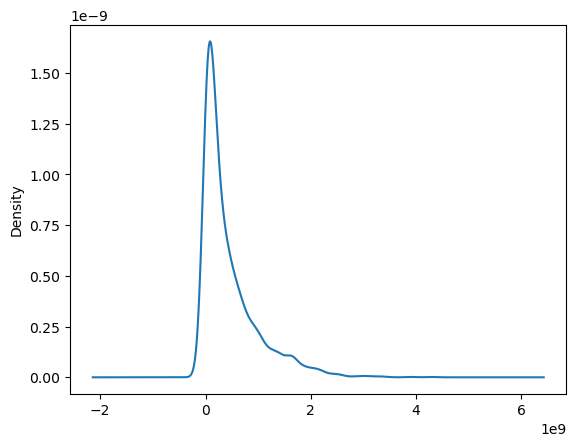

In [33]:
df["Spotify Streams"].plot(kind='kde')

In [34]:
df["Spotify Streams"].fillna(df["Spotify Streams"].median(),inplace=True)
df["Spotify Streams"].isnull().sum()

0

In [36]:
df.head(1)

,Track,Album Name,Artist,Release Date,ISRC,All Time Rank,Track Score,Spotify Streams,Spotify Playlist Count,Spotify Playlist Reach,...,Apple Music Playlist Count,AirPlay Spins,SiriusXM Spins,Deezer Playlist Count,Deezer Playlist Reach,Amazon Playlist Count,Pandora Streams,Pandora Track Stations,Shazam Counts,Explicit Track
0,MILLION DOLLAR BABY,Million Dollar Baby - Single,Tommy Richman,2024-04-26,QM24S2402528,1,725.4,390470936.0,30716.0,196631588.0,...,210.0,40975.0,684.0,62.0,17598718.0,114.0,18004655.0,22931.0,2669262.0,0


<Axes: ylabel='Density'>

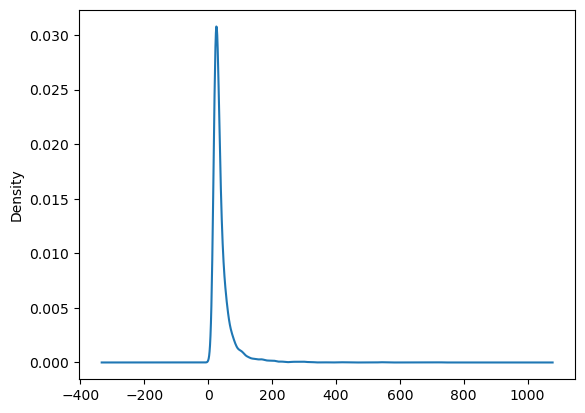

In [38]:
df["Track Score"].plot(kind="kde")

In [40]:
for i in df.select_dtypes(np.number):
    print(i,round(df[i].skew(),2))

Track Score 5.69
Spotify Streams 2.06
Spotify Playlist Count 1.84
Spotify Playlist Reach 2.6
Spotify Popularity -2.05
YouTube Views 6.02
YouTube Likes 4.22
TikTok Posts 7.63
TikTok Likes 32.06
TikTok Views 31.02
YouTube Playlist Reach 3.68
Apple Music Playlist Count 2.89
AirPlay Spins 5.17
SiriusXM Spins 6.08
Deezer Playlist Count 4.79
Deezer Playlist Reach 6.12
Amazon Playlist Count 2.19
Pandora Streams 3.15
Pandora Track Stations 6.72
Shazam Counts 18.48
Explicit Track 0.59


In [41]:
for i in df.columns[7:27]:
    df[i].fillna(df[i].median(),inplace=True)

In [42]:
df.drop_duplicates()

,Track,Album Name,Artist,Release Date,ISRC,All Time Rank,Track Score,Spotify Streams,Spotify Playlist Count,Spotify Playlist Reach,...,Apple Music Playlist Count,AirPlay Spins,SiriusXM Spins,Deezer Playlist Count,Deezer Playlist Reach,Amazon Playlist Count,Pandora Streams,Pandora Track Stations,Shazam Counts,Explicit Track
0,MILLION DOLLAR BABY,Million Dollar Baby - Single,Tommy Richman,2024-04-26,QM24S2402528,1,725.4,3.904709e+08,30716.0,196631588.0,...,210.0,40975.0,684.0,62.0,17598718.0,114.0,18004655.0,22931.0,2669262.0,0
1,Not Like Us,Not Like Us,Kendrick Lamar,2024-05-04,USUG12400910,2,545.9,3.237039e+08,28113.0,174597137.0,...,188.0,40778.0,3.0,67.0,10422430.0,111.0,7780028.0,28444.0,1118279.0,1
2,i like the way you kiss me,I like the way you kiss me,Artemas,2024-03-19,QZJ842400387,3,538.4,6.013093e+08,54331.0,211607669.0,...,190.0,74333.0,536.0,136.0,36321847.0,172.0,5022621.0,5639.0,5285340.0,0
3,Flowers,Flowers - Single,Miley Cyrus,2023-01-12,USSM12209777,4,444.9,2.031281e+09,269802.0,136569078.0,...,394.0,1474799.0,2182.0,264.0,24684248.0,210.0,190260277.0,203384.0,11822942.0,0
4,Houdini,Houdini,Eminem,2024-05-31,USUG12403398,5,423.3,1.070349e+08,7223.0,151469874.0,...,182.0,12185.0,1.0,82.0,17660624.0,105.0,4493884.0,7006.0,457017.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4595,For the Last Time,For the Last Time,$uicideboy$,2017-09-05,QM8DG1703420,4585,19.4,3.050500e+08,65770.0,5103054.0,...,3.0,6.0,86.0,2.0,14217.0,17.0,20104066.0,13184.0,656337.0,1
4596,Dil Meri Na Sune,"Dil Meri Na Sune (From ""Genius"")",Atif Aslam,2018-07-27,INT101800122,4575,19.4,5.228236e+07,4602.0,1449767.0,...,1.0,412.0,86.0,1.0,927.0,17.0,12735768.5,7832.0,193590.0,0
4597,Grace (feat. 42 Dugg),My Turn,Lil Baby,2020-02-28,USUG12000043,4571,19.4,1.899727e+08,72066.0,6704802.0,...,19.0,204.0,86.0,1.0,74.0,6.0,84426740.0,28999.0,1135998.0,1
4598,Nashe Si Chadh Gayi,November Top 10 Songs,Arijit Singh,2016-11-08,INY091600067,4591,19.4,1.454670e+08,14037.0,7387064.0,...,1.0,1200.0,86.0,15.0,237120.5,7.0,6817840.0,7832.0,448292.0,0


In [43]:
df.isnull().sum()

Track                         0
Album Name                    0
Artist                        0
Release Date                  0
ISRC                          0
All Time Rank                 0
Track Score                   0
Spotify Streams               0
Spotify Playlist Count        0
Spotify Playlist Reach        0
Spotify Popularity            0
YouTube Views                 0
YouTube Likes                 0
TikTok Posts                  0
TikTok Likes                  0
TikTok Views                  0
YouTube Playlist Reach        0
Apple Music Playlist Count    0
AirPlay Spins                 0
SiriusXM Spins                0
Deezer Playlist Count         0
Deezer Playlist Reach         0
Amazon Playlist Count         0
Pandora Streams               0
Pandora Track Stations        0
Shazam Counts                 0
Explicit Track                0
dtype: int64

<Axes: xlabel='Artist'>

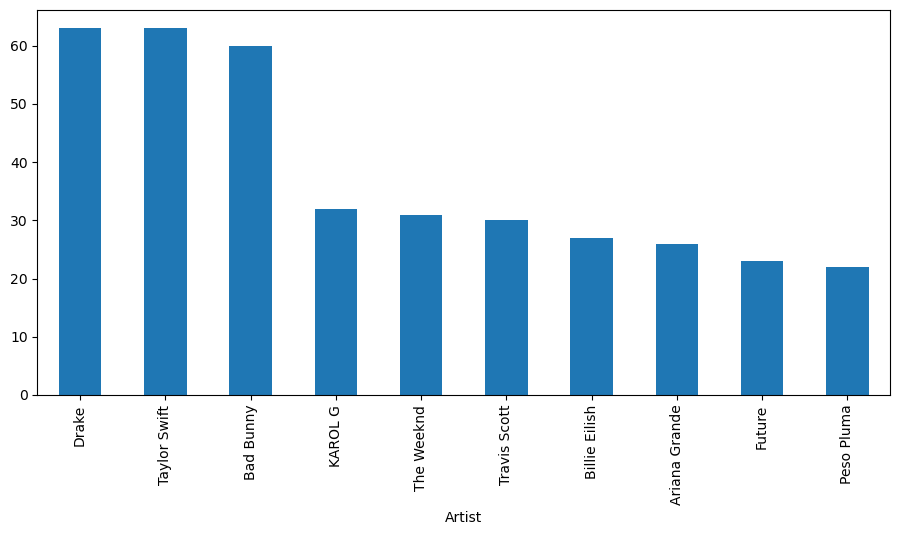

In [44]:
plt.figure(figsize=(11,5))
df["Artist"].value_counts().head(10).plot(kind="bar")

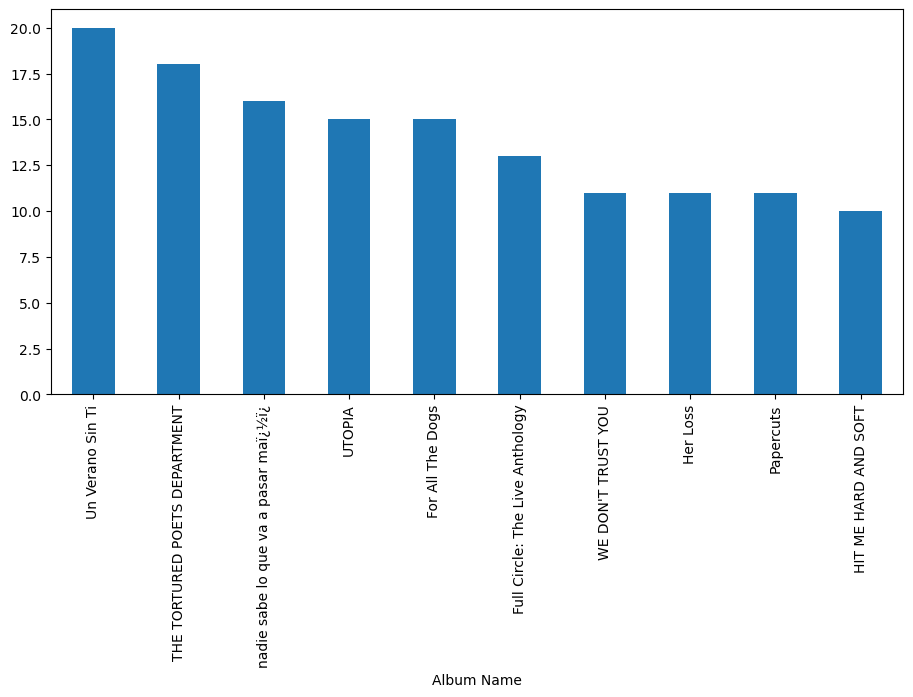

In [45]:
plt.figure(figsize=(11,5))
df["Album Name"].value_counts().head(10).plot(kind="bar")
plt.xticks()
plt.show()

In [46]:
df.head(1)

,Track,Album Name,Artist,Release Date,ISRC,All Time Rank,Track Score,Spotify Streams,Spotify Playlist Count,Spotify Playlist Reach,...,Apple Music Playlist Count,AirPlay Spins,SiriusXM Spins,Deezer Playlist Count,Deezer Playlist Reach,Amazon Playlist Count,Pandora Streams,Pandora Track Stations,Shazam Counts,Explicit Track
0,MILLION DOLLAR BABY,Million Dollar Baby - Single,Tommy Richman,2024-04-26,QM24S2402528,1,725.4,390470936.0,30716.0,196631588.0,...,210.0,40975.0,684.0,62.0,17598718.0,114.0,18004655.0,22931.0,2669262.0,0


<Axes: >

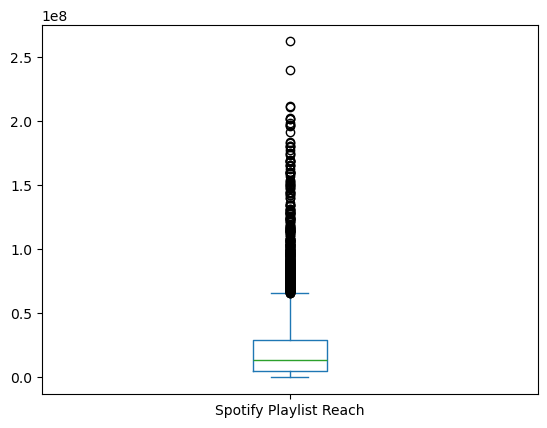

In [50]:
df["Spotify Playlist Reach"].plot(kind="box")

<Axes: ylabel='Density'>

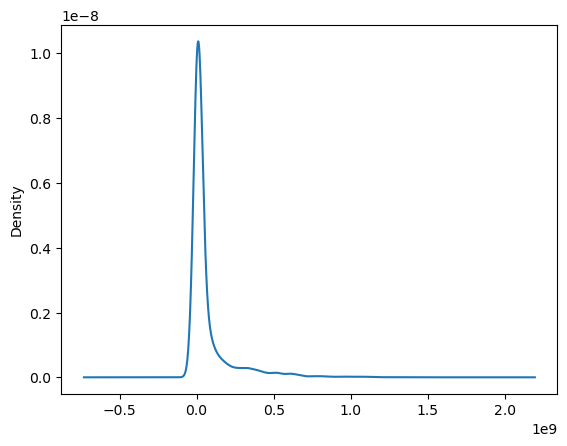

In [53]:
df["Pandora Streams"].plot(kind="kde")

<Axes: ylabel='Density'>

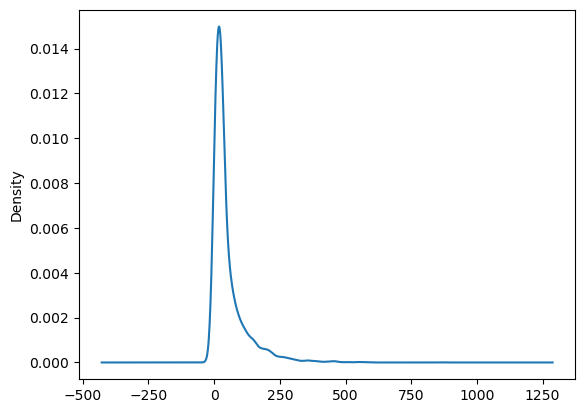

In [56]:
df["Apple Music Playlist Count"].plot(kind="kde")

In [54]:
df.head(1)

,Track,Album Name,Artist,Release Date,ISRC,All Time Rank,Track Score,Spotify Streams,Spotify Playlist Count,Spotify Playlist Reach,...,Apple Music Playlist Count,AirPlay Spins,SiriusXM Spins,Deezer Playlist Count,Deezer Playlist Reach,Amazon Playlist Count,Pandora Streams,Pandora Track Stations,Shazam Counts,Explicit Track
0,MILLION DOLLAR BABY,Million Dollar Baby - Single,Tommy Richman,2024-04-26,QM24S2402528,1,725.4,390470936.0,30716.0,196631588.0,...,210.0,40975.0,684.0,62.0,17598718.0,114.0,18004655.0,22931.0,2669262.0,0


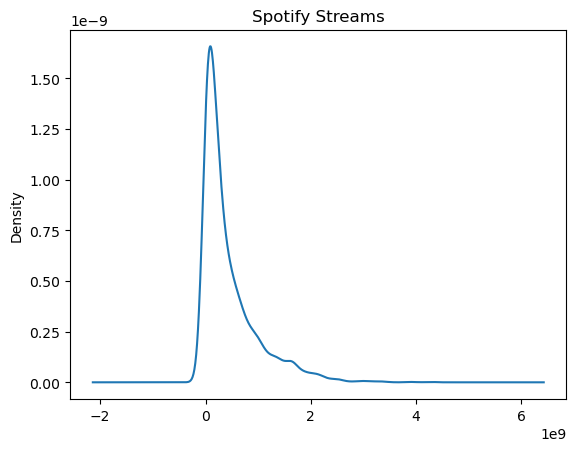

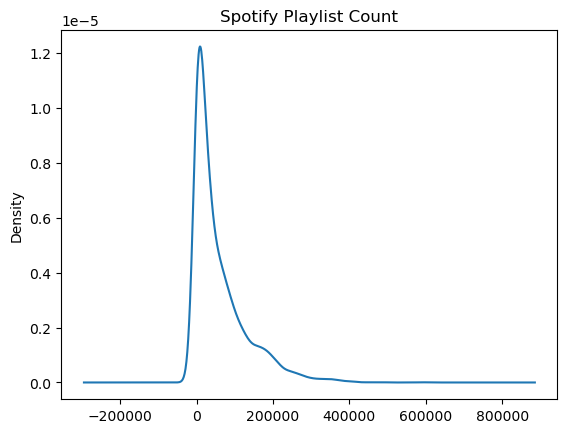

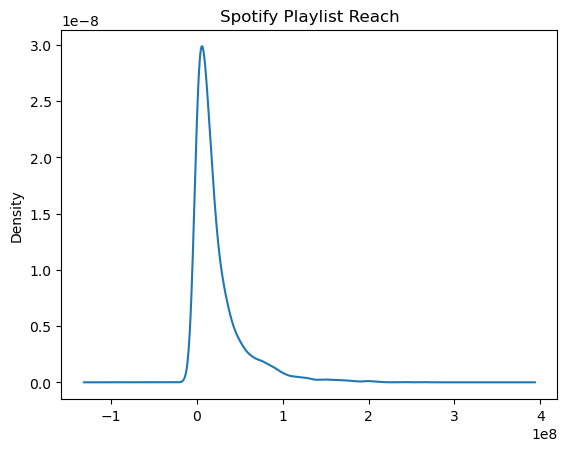

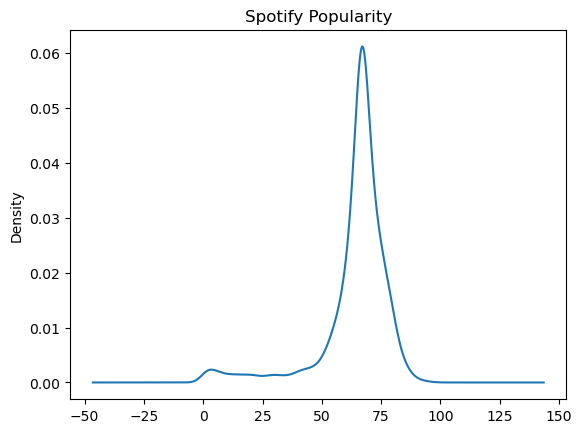

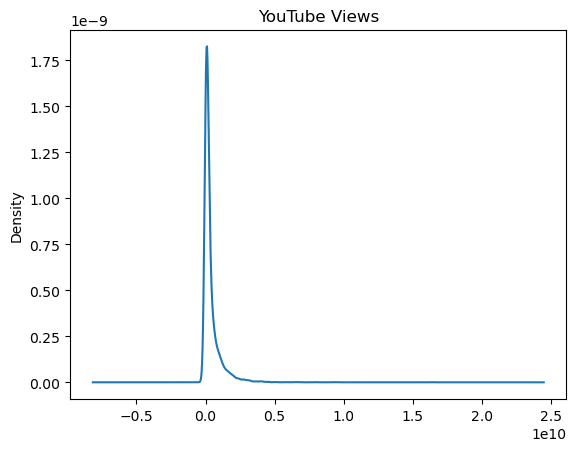

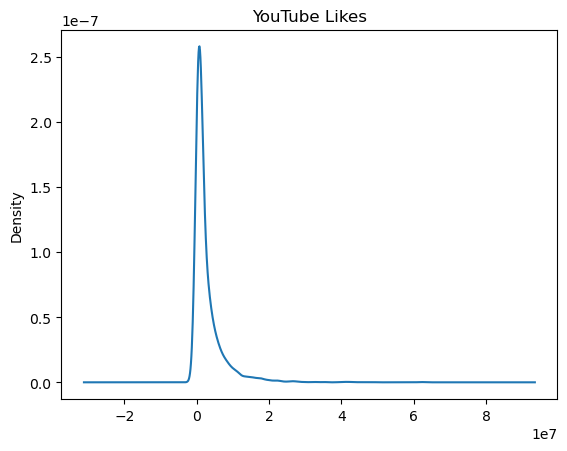

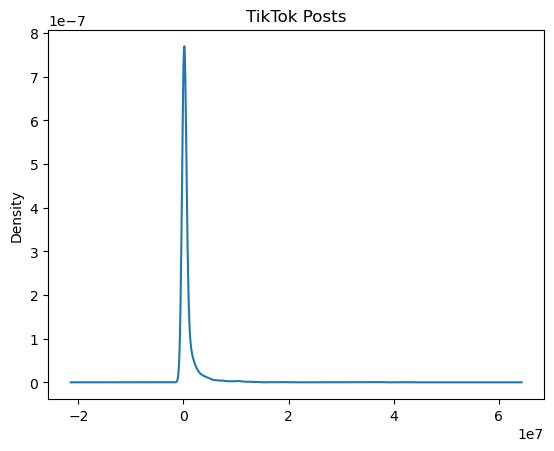

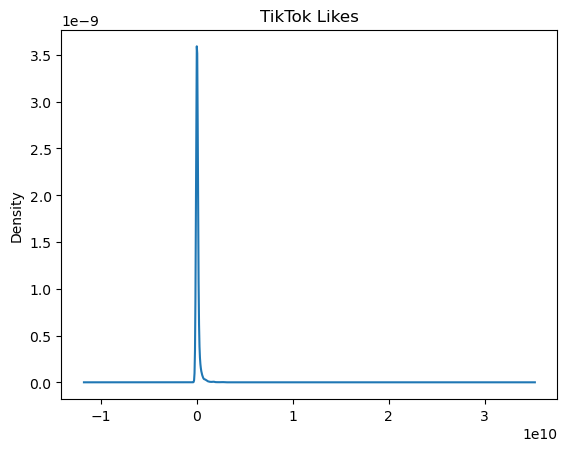

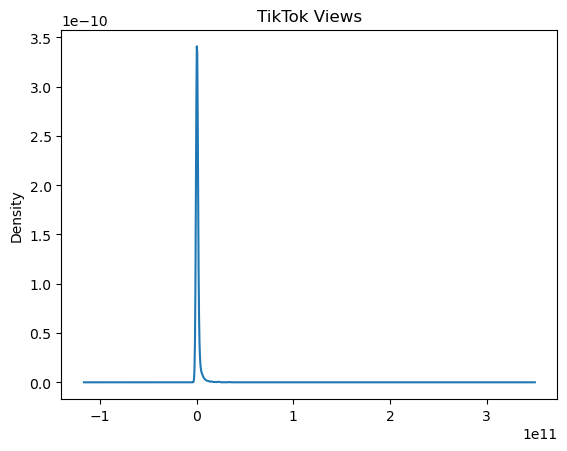

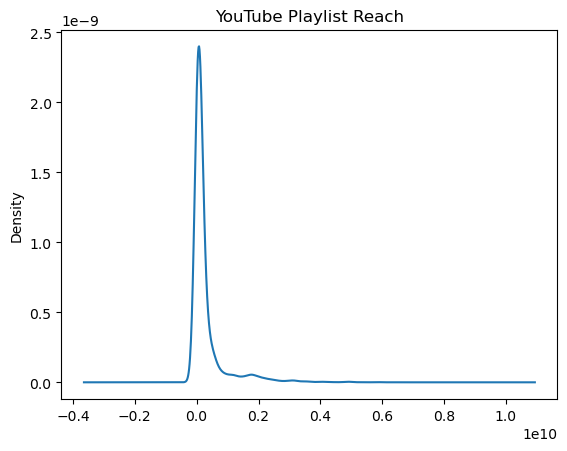

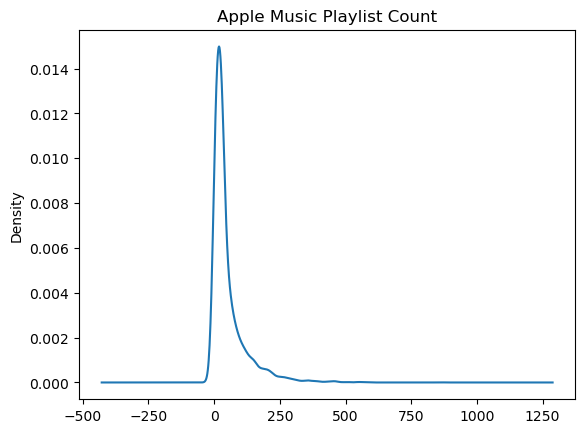

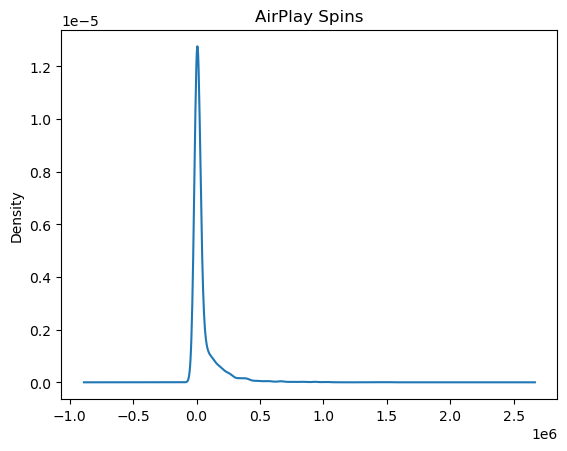

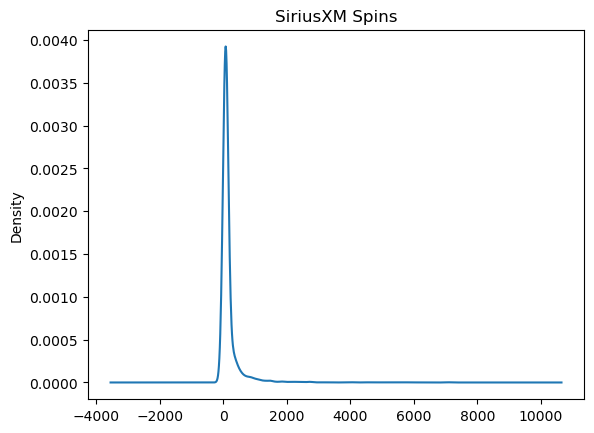

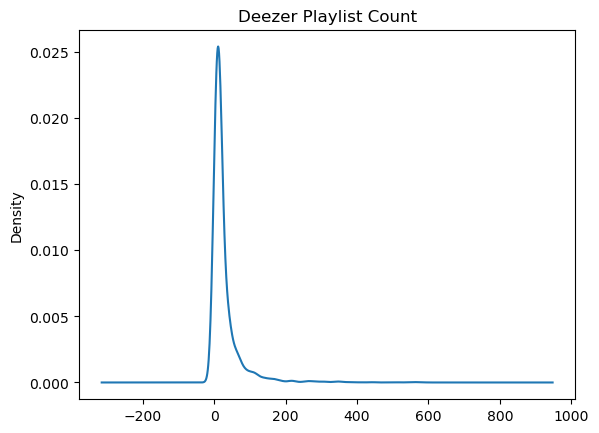

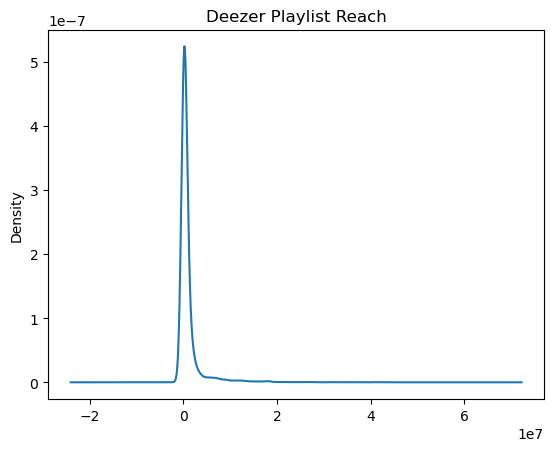

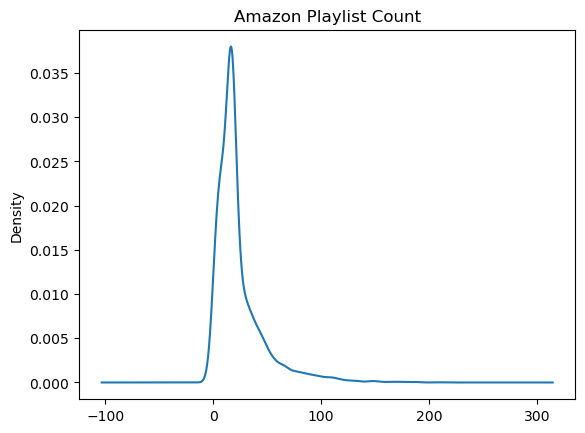

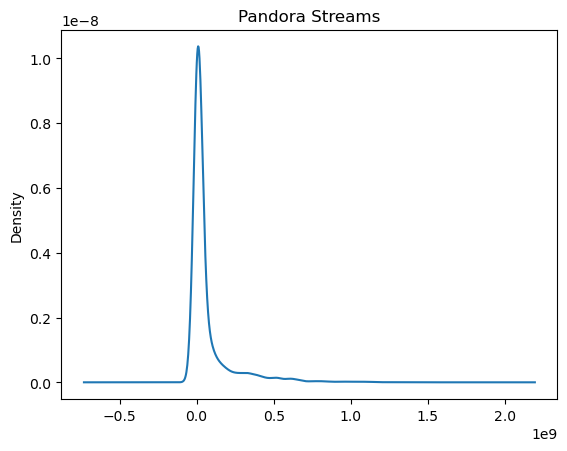

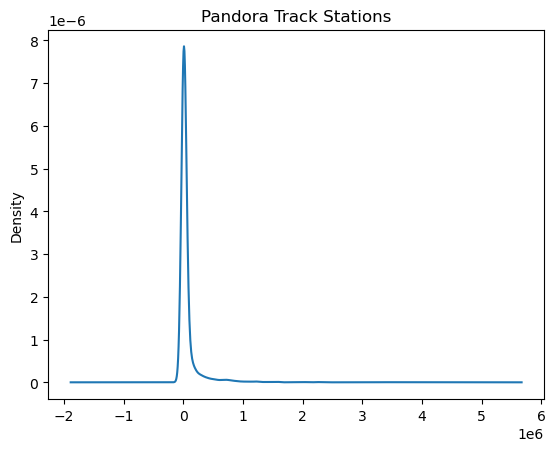

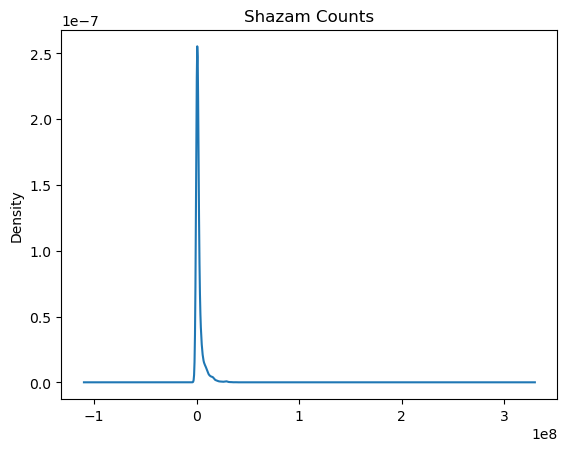

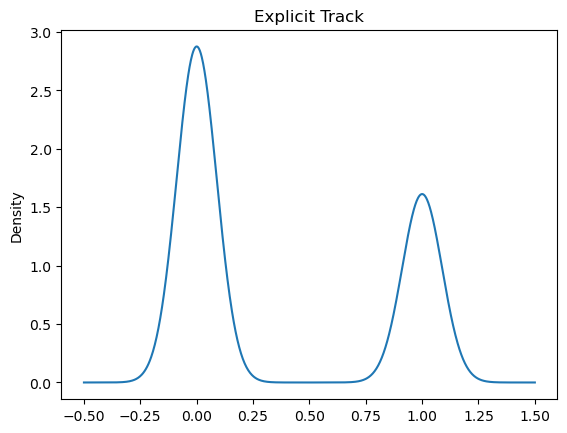

In [57]:
for i in df.columns[7:]:
    df[i].plot(kind="kde")
    plt.title(i)
    plt.show()

In [59]:
df.head(1)

,Track,Album Name,Artist,Release Date,ISRC,All Time Rank,Track Score,Spotify Streams,Spotify Playlist Count,Spotify Playlist Reach,...,Apple Music Playlist Count,AirPlay Spins,SiriusXM Spins,Deezer Playlist Count,Deezer Playlist Reach,Amazon Playlist Count,Pandora Streams,Pandora Track Stations,Shazam Counts,Explicit Track
0,MILLION DOLLAR BABY,Million Dollar Baby - Single,Tommy Richman,2024-04-26,QM24S2402528,1,725.4,390470936.0,30716.0,196631588.0,...,210.0,40975.0,684.0,62.0,17598718.0,114.0,18004655.0,22931.0,2669262.0,0


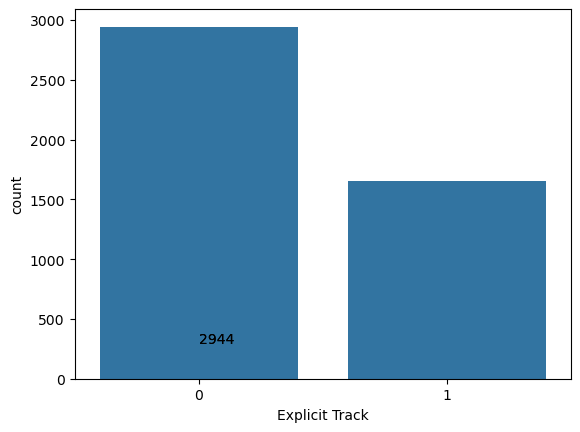

In [61]:
sns.countplot(df,x=df["Explicit Track"])
plt.text(x=0,y=300,s=df[df["Explicit Track"]==0].shape[0])
plt.text(x=0,y=300,s=df[df["Explicit Track"]==0].shape[0])
plt.show()

In [62]:
df.columns

Index(['Track', 'Album Name', 'Artist', 'Release Date', 'ISRC',
       'All Time Rank', 'Track Score', 'Spotify Streams',
       'Spotify Playlist Count', 'Spotify Playlist Reach',
       'Spotify Popularity', 'YouTube Views', 'YouTube Likes', 'TikTok Posts',
       'TikTok Likes', 'TikTok Views', 'YouTube Playlist Reach',
       'Apple Music Playlist Count', 'AirPlay Spins', 'SiriusXM Spins',
       'Deezer Playlist Count', 'Deezer Playlist Reach',
       'Amazon Playlist Count', 'Pandora Streams', 'Pandora Track Stations',
       'Shazam Counts', 'Explicit Track'],
      dtype='object')

<Figure size 1500x500 with 0 Axes>

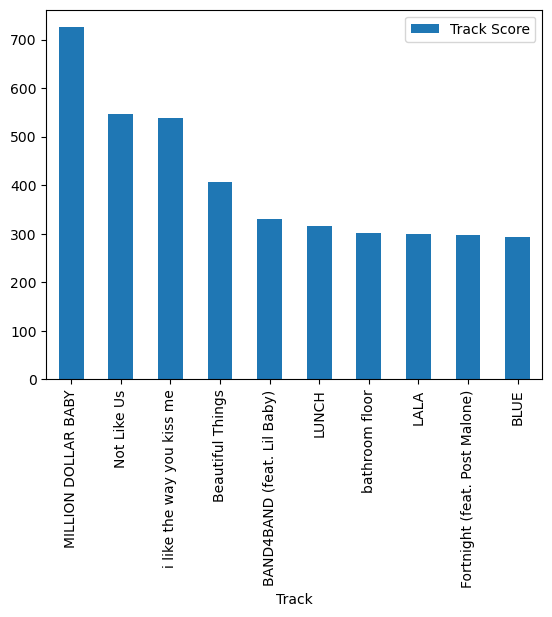

In [63]:
a=df.groupby("Track")["Track Score"].mean().to_frame().sort_values(by="Track Score",ascending=False)
plt.figure(figsize=(15,5))
a.head(10).plot(kind="bar")
plt.xticks(rotation=90)
plt.show()

<Axes: xlabel='Track'>

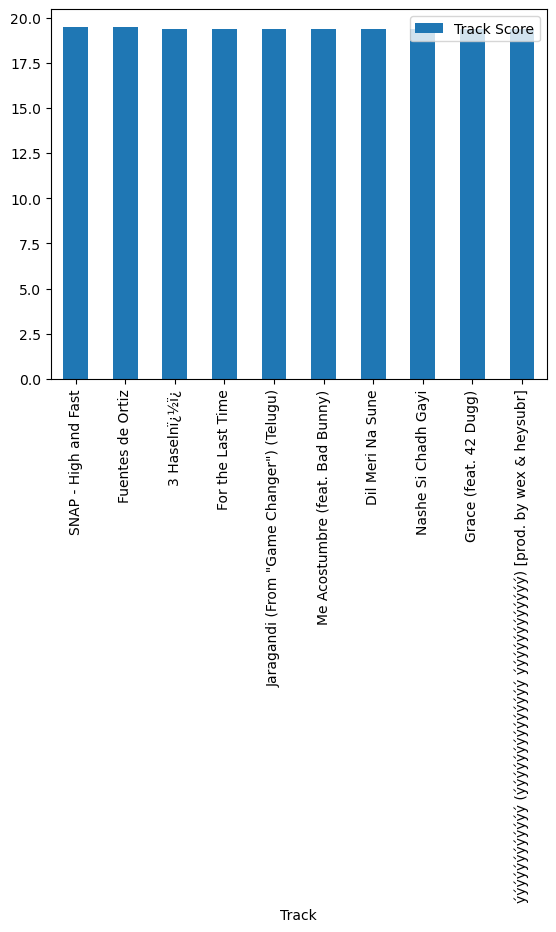

In [64]:
a.tail(10).plot(kind="bar")

In [65]:
a=df.groupby("Track")["Track Score"].mean().reset_index().sort_values(by="Track Score",ascending=False)
a["Track"]

2188                                  MILLION DOLLAR BABY
2554                                          Not Like Us
4224                           i like the way you kiss me
437                                      Beautiful Things
295                            BAND4BAND (feat. Lil Baby)
                              ...                        
2274                      Me Acostumbre (feat. Bad Bunny)
968                                      Dil Meri Na Sune
2456                                  Nashe Si Chadh Gayi
1443                                Grace (feat. 42 Dugg)
4338    ýýýýýýýýýýýý (ýýýýýýýýýýýýýý ýýýýýýýýýýýý) [pr...
Name: Track, Length: 4365, dtype: object

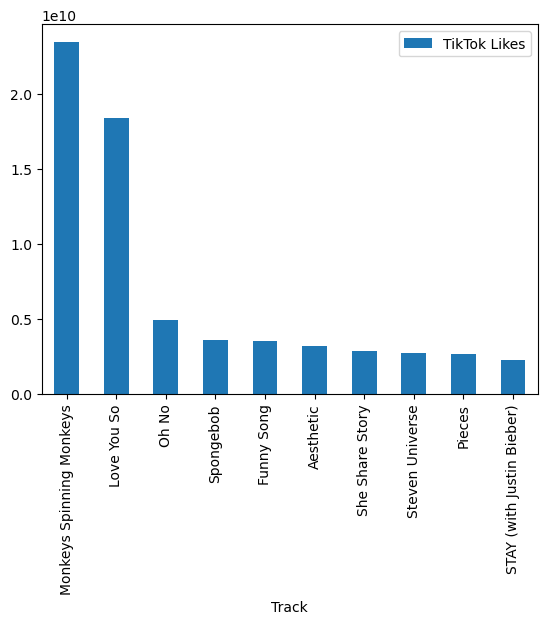

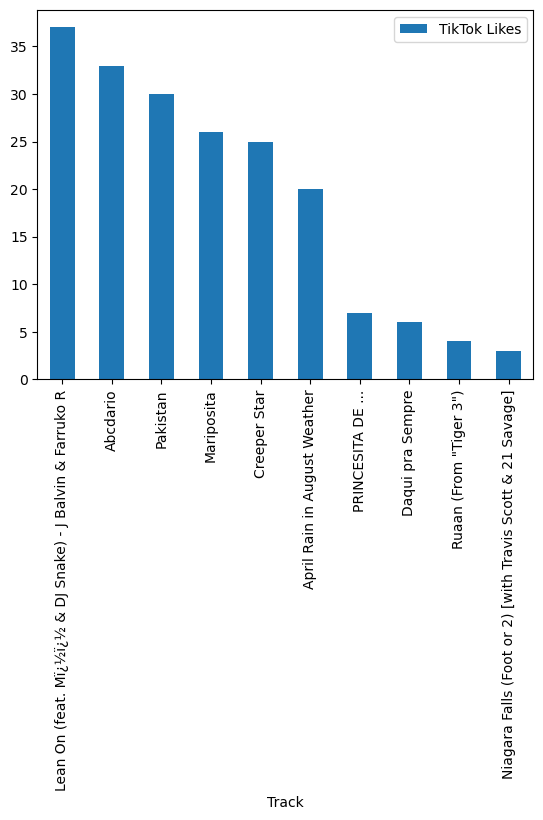

In [67]:
a=df.groupby("Track")['TikTok Likes'].sum().to_frame().sort_values(by='TikTok Likes',ascending=False)
a.head(10).plot(kind='bar')
plt.show()
a.tail(10).plot(kind='bar')
plt.show()

In [ ]:
b = df.groupby('Track')['TikTok Posts'].sum().to_frame().sort_values(by='TikTok Posts', ascending=False)
b_bottom10 = b.tail(10).reset_index()
sns.barplot(x='Track', y='TikTok Posts', data=b_bottom10)
plt.xticks(rotation=90)

plt.show()

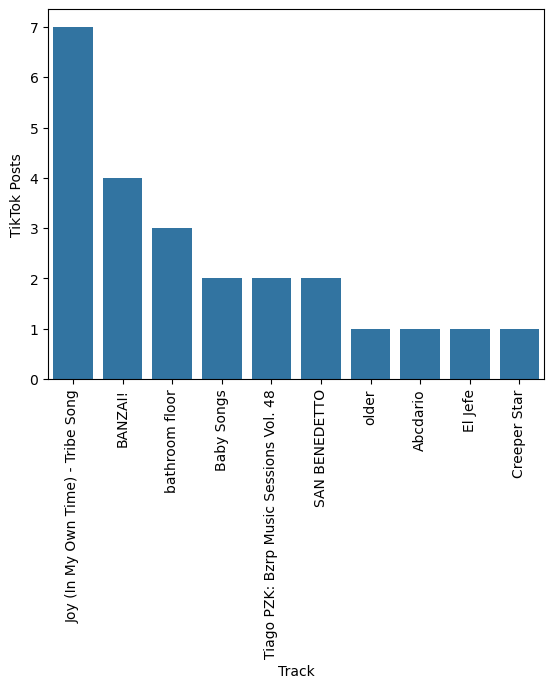

In [70]:
b=df.groupby('Track')['TikTok Posts'].sum().to_frame().sort_values(by='TikTok Posts',ascending=False)
b_bottom10=b.tail(10).reset_index()
sns.barplot(x='Track',y='TikTok Posts',data=b_bottom10)
plt.xticks(rotation=90)
plt.show()

<Axes: xlabel='Track'>

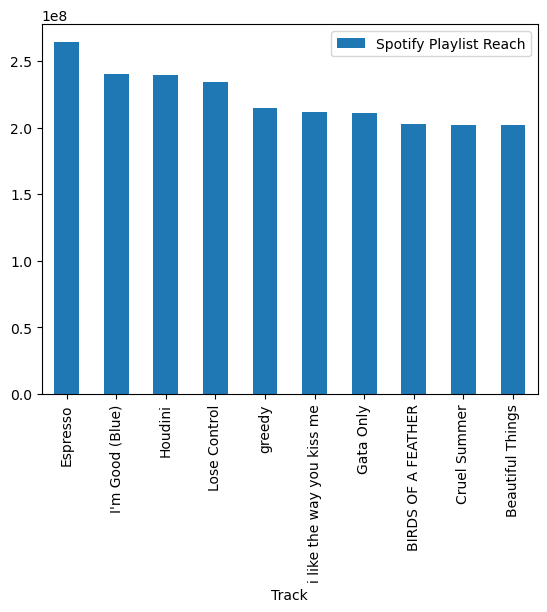

In [71]:
b=df.groupby('Track')['Spotify Playlist Reach'].sum().to_frame().sort_values(by=('Spotify Playlist Reach'),ascending=False)
b.head(10).plot(kind='bar')

<Axes: xlabel='Track'>

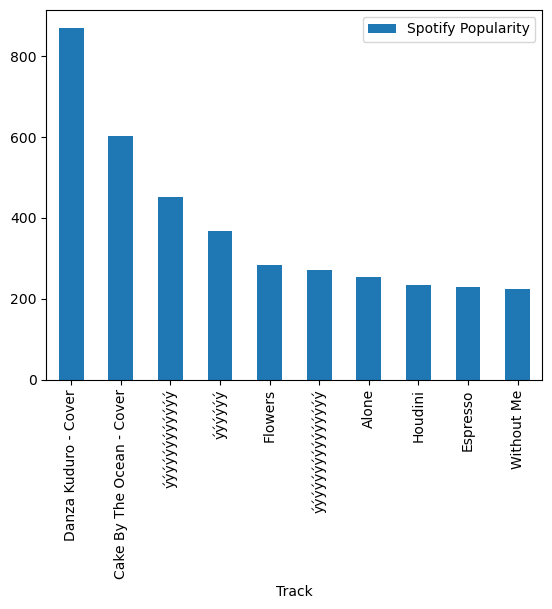

In [72]:
c=df.groupby('Track')['Spotify Popularity'].sum().to_frame().sort_values(by=("Spotify Popularity"),ascending=False)
c.head(10).plot(kind="bar")

In [73]:
df.head(1)

,Track,Album Name,Artist,Release Date,ISRC,All Time Rank,Track Score,Spotify Streams,Spotify Playlist Count,Spotify Playlist Reach,...,Apple Music Playlist Count,AirPlay Spins,SiriusXM Spins,Deezer Playlist Count,Deezer Playlist Reach,Amazon Playlist Count,Pandora Streams,Pandora Track Stations,Shazam Counts,Explicit Track
0,MILLION DOLLAR BABY,Million Dollar Baby - Single,Tommy Richman,2024-04-26,QM24S2402528,1,725.4,390470936.0,30716.0,196631588.0,...,210.0,40975.0,684.0,62.0,17598718.0,114.0,18004655.0,22931.0,2669262.0,0


Text(0.5, 1.0, 'Maximum youtube Likes for tracks')

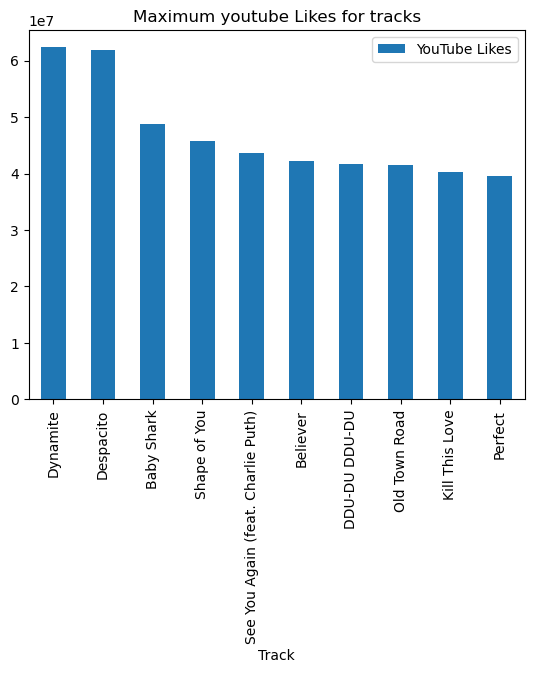

In [74]:
max_youtubelikes=df.groupby("Track")["YouTube Likes"].max().to_frame().sort_values(by="YouTube Likes",ascending=False).head(10)
max_youtubelikes.plot(kind="bar")
plt.title("Maximum youtube Likes for tracks")

Text(0.5, 1.0, 'Minimum Youtube Likes ')

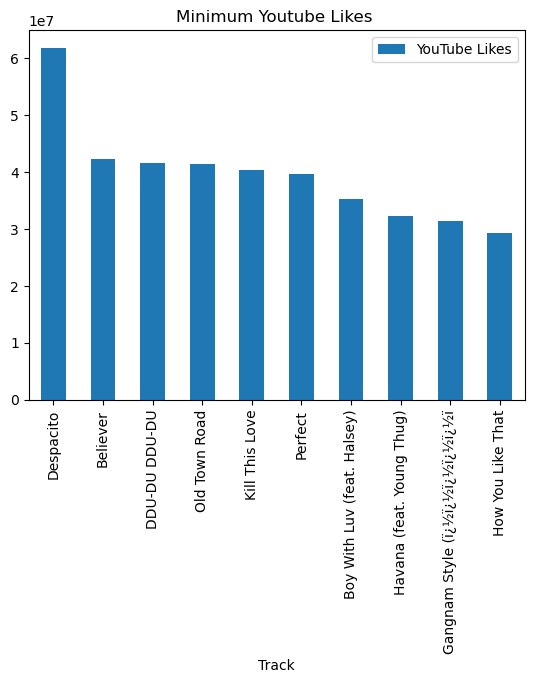

In [75]:
min_youtubelikes=df.groupby("Track")["YouTube Likes"].min().to_frame().sort_values(by="YouTube Likes",ascending=False).head(10)
min_youtubelikes.plot(kind="bar")
plt.title("Minimum Youtube Likes ")

In [77]:
gp=df.groupby('Track')["Spotify Streams"].sum().to_frame().sort_values(by="Spotify Streams",ascending=False)
gp=gp.head(10).reset_index()

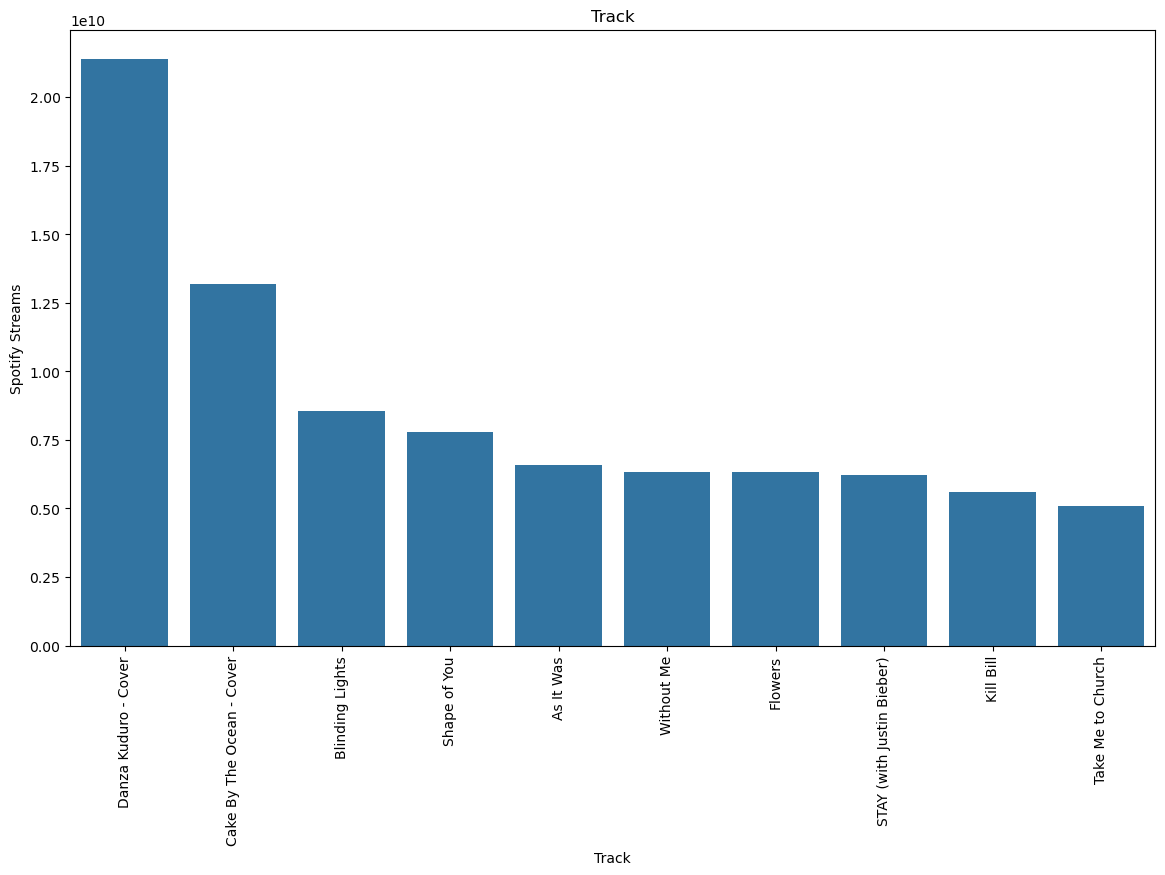

In [78]:
plt.figure(figsize=(14,8))
sns.barplot(data=gp,x="Track",y="Spotify Streams")
plt.xticks(rotation=90)
plt.title("Total Spotify Streams per Streams")
plt.title("Track")
plt.ylabel("Spotify Streams")
plt.show()

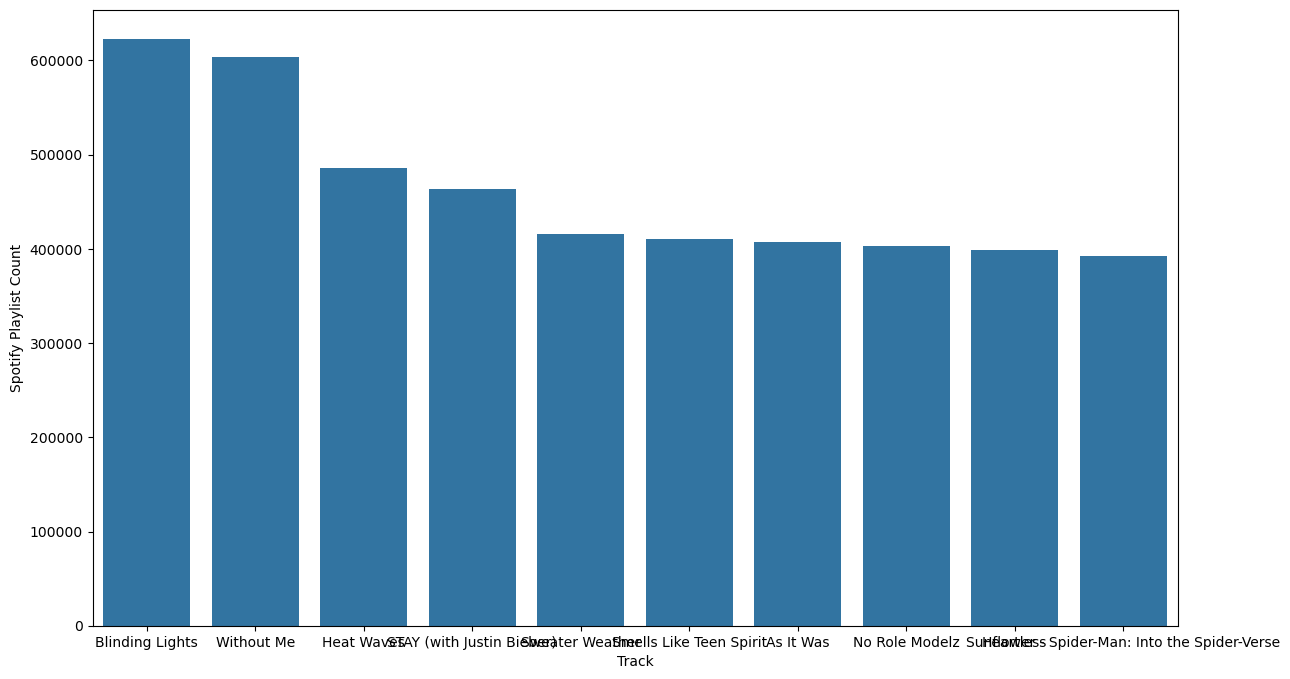

In [80]:
grp=df.groupby('Track')['Spotify Playlist Count'].sum().to_frame().sort_values(by='Spotify Playlist Count',ascending=False)
grp=grp.head(10).reset_index()
plt.figure(figsize=(14, 8))
sns.barplot(data=grp, x='Track', y='Spotify Playlist Count')
plt.xlabel('Track')
plt.ylabel('Spotify Playlist Count')
plt.show()

In [81]:
df.columns

Index(['Track', 'Album Name', 'Artist', 'Release Date', 'ISRC',
       'All Time Rank', 'Track Score', 'Spotify Streams',
       'Spotify Playlist Count', 'Spotify Playlist Reach',
       'Spotify Popularity', 'YouTube Views', 'YouTube Likes', 'TikTok Posts',
       'TikTok Likes', 'TikTok Views', 'YouTube Playlist Reach',
       'Apple Music Playlist Count', 'AirPlay Spins', 'SiriusXM Spins',
       'Deezer Playlist Count', 'Deezer Playlist Reach',
       'Amazon Playlist Count', 'Pandora Streams', 'Pandora Track Stations',
       'Shazam Counts', 'Explicit Track'],
      dtype='object')

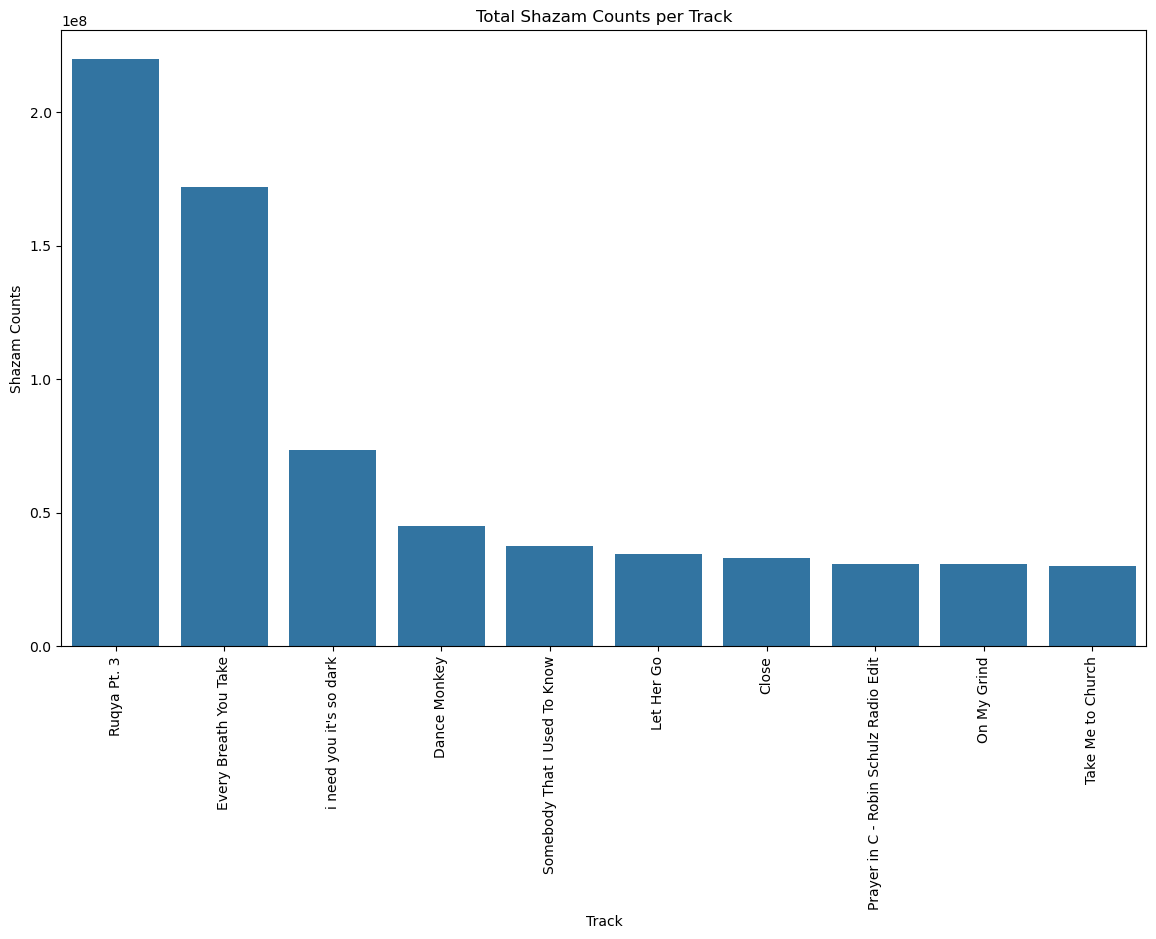

In [82]:
grp=df.groupby('Track')['Shazam Counts'].sum().to_frame().sort_values(by='Shazam Counts',ascending=False)
grp=grp.head(10).reset_index()
plt.figure(figsize=(14, 8))
sns.barplot(data=grp.head(10), x='Track', y='Shazam Counts')
plt.xticks(rotation=90) 
plt.title('Total Shazam Counts per Track')
plt.xlabel('Track')
plt.ylabel('Shazam Counts')
plt.show()

<Axes: xlabel='Track'>

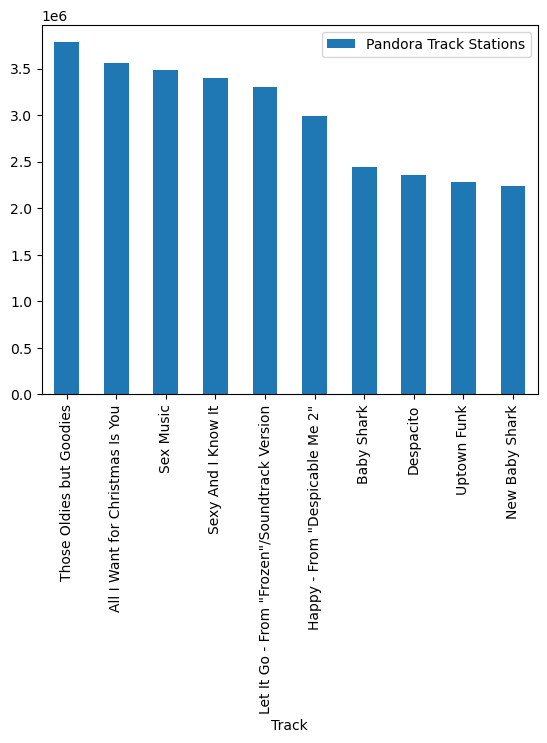

In [84]:
k=df.groupby("Track")["Pandora Track Stations"].sum().to_frame().sort_values(by=('Pandora Track Stations'),ascending=False)
k.head(10).plot(kind="bar")

<Axes: xlabel='Track'>

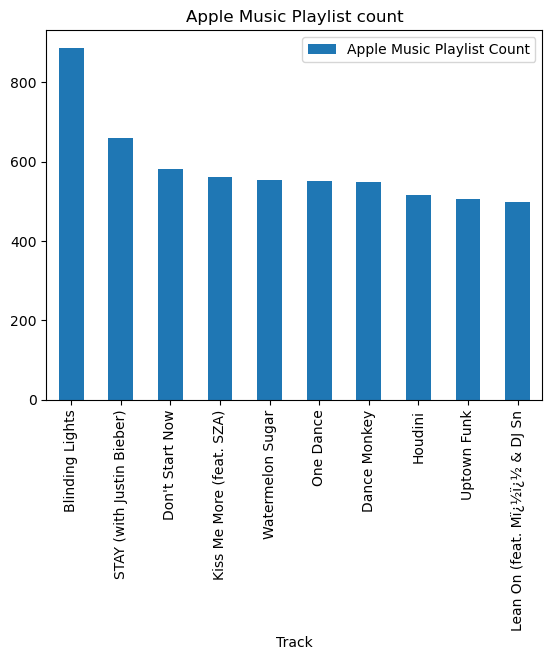

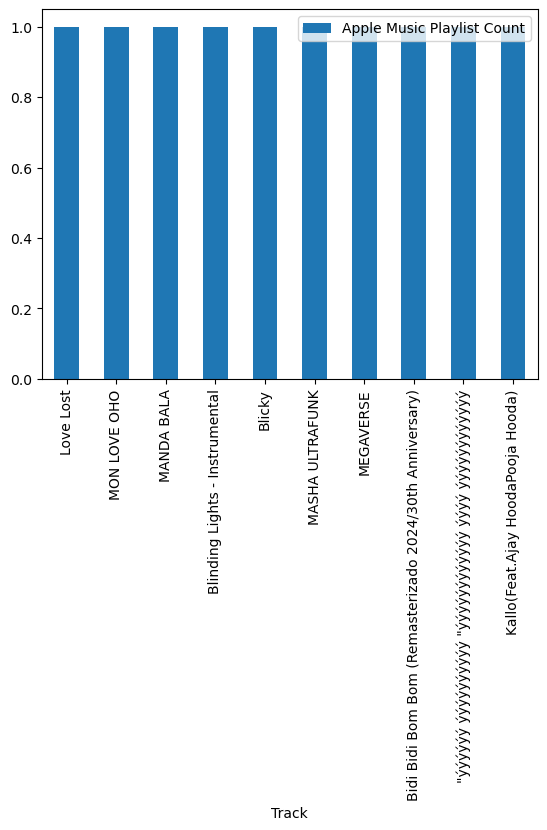

In [85]:
z=df.groupby("Track")["Apple Music Playlist Count"].sum().to_frame().sort_values(by="Apple Music Playlist Count",ascending=False)
z.head(10).plot(kind="bar")
plt.title("Apple Music Playlist count")
z.tail(10).plot(kind="bar")

<Axes: xlabel='Track'>

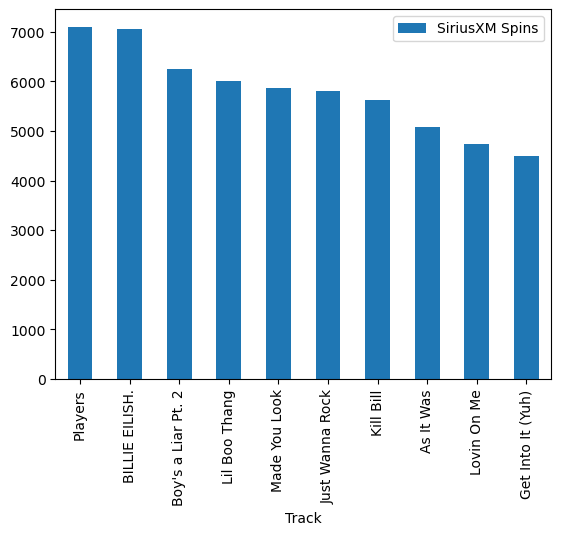

In [86]:
sirus=df.groupby("Track")["SiriusXM Spins"].sum().to_frame().sort_values(by="SiriusXM Spins",ascending=False)
sirus.head(10).plot(kind="bar")

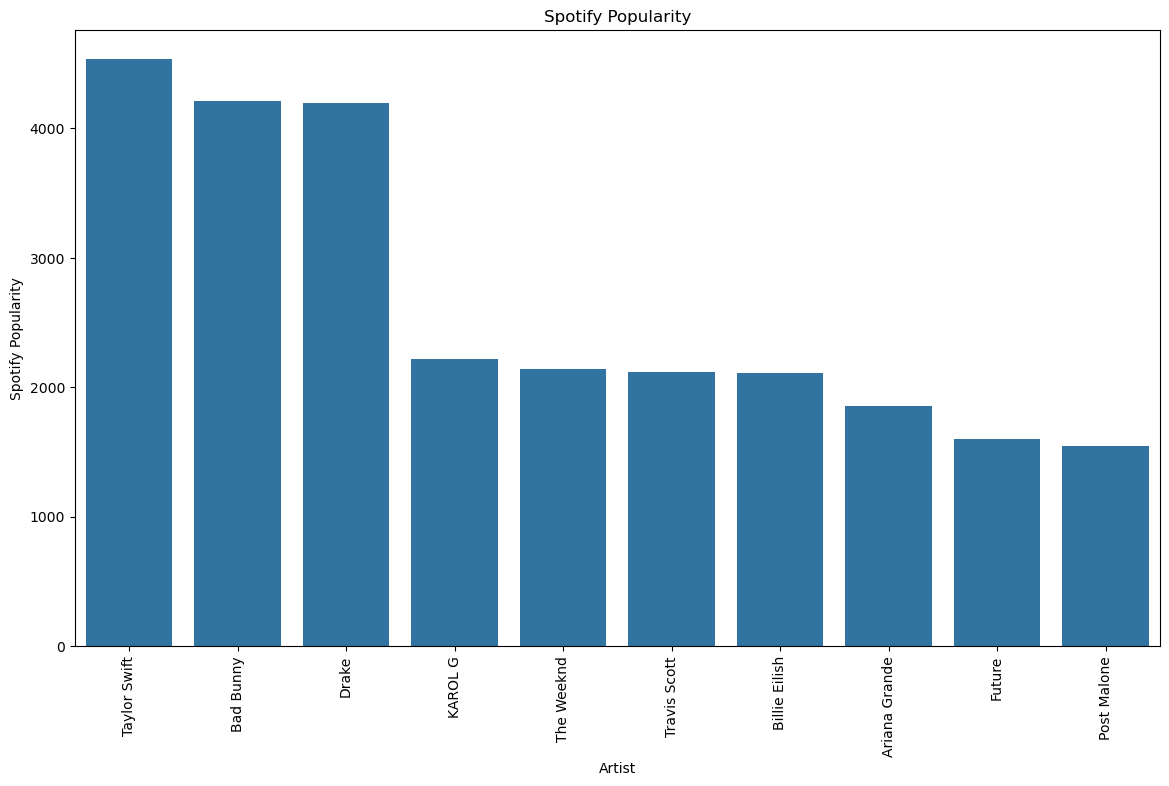

In [87]:
art=df.groupby("Artist")["Spotify Popularity"].sum().to_frame().sort_values(by="Spotify Popularity",ascending=False)
art=art.head(10).reset_index()
plt.figure(figsize=(14, 8))
sns.barplot(data=art.head(10), x='Artist', y='Spotify Popularity')
plt.xticks(rotation=90) 
plt.title('Spotify Popularity')
plt.xlabel('Artist')
plt.ylabel('Spotify Popularity')
plt.show()

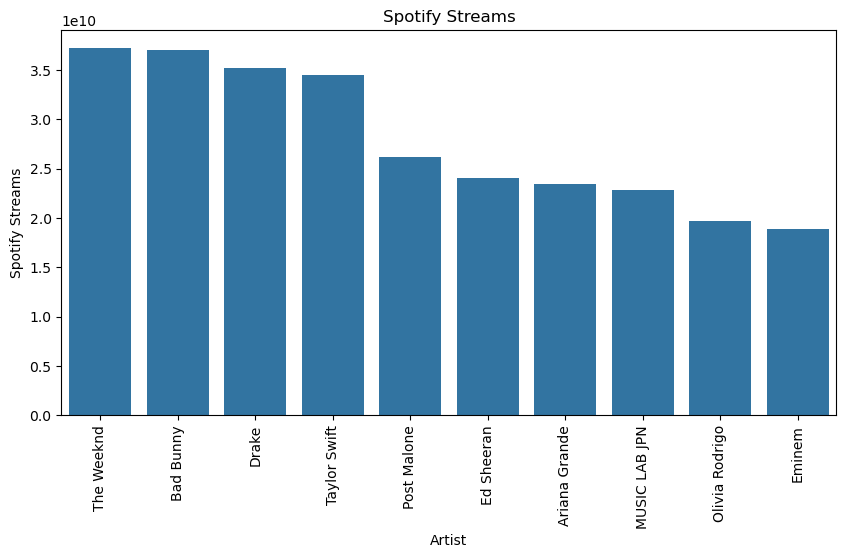

In [88]:
artist_with_highest_stream=df.groupby('Artist')['Spotify Streams'].sum().to_frame().sort_values(by='Spotify Streams',ascending=False).head(10).reset_index()
plt.figure(figsize=(10,5))
sns.barplot(data=artist_with_highest_stream, x='Artist', y='Spotify Streams')
plt.xticks(rotation=90)
plt.title('Spotify Streams')
plt.xlabel('Artist')
plt.ylabel('Spotify Streams')
plt.show()

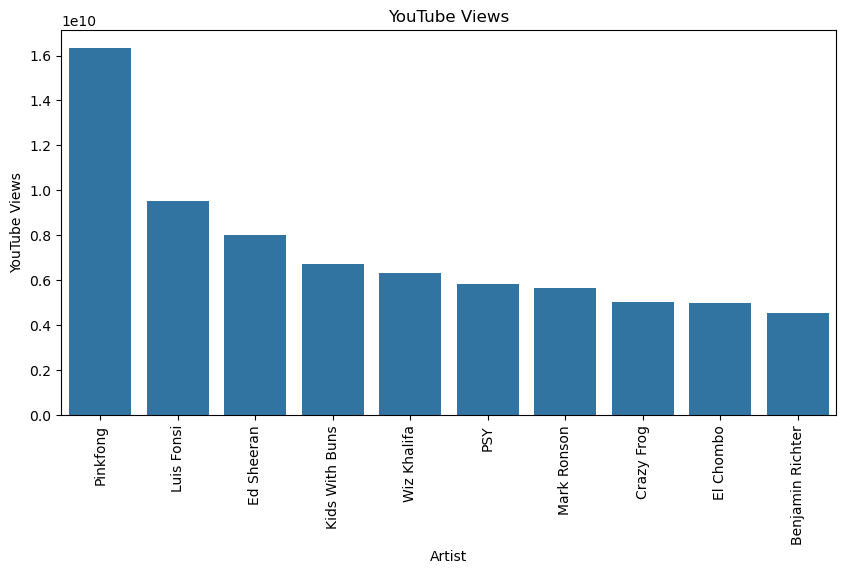

In [89]:
artist_with_highest_YouTube_views=df.groupby('Artist')['YouTube Views'].max().to_frame().sort_values(by='YouTube Views',ascending=False).head(10).reset_index()
artist_with_highest_YouTube_views
plt.figure(figsize=(10,5))
sns.barplot(data=artist_with_highest_YouTube_views, x='Artist', y='YouTube Views')
plt.xticks(rotation=90)
plt.title('YouTube Views')
plt.xlabel('Artist')
plt.ylabel('YouTube Views')
plt.show()

<Axes: ylabel='Density'>

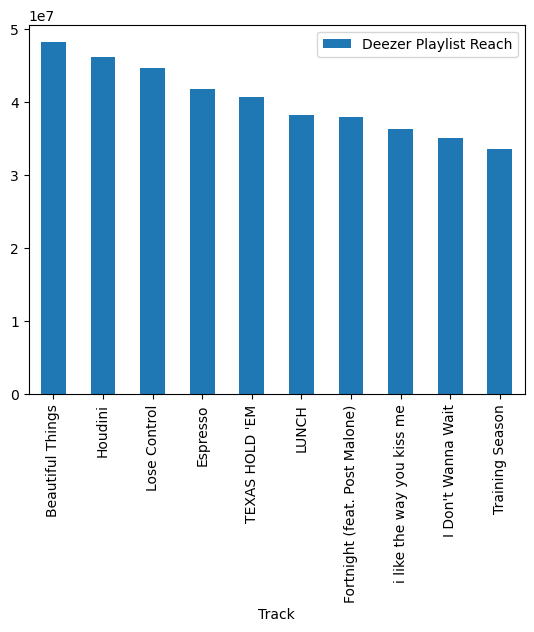

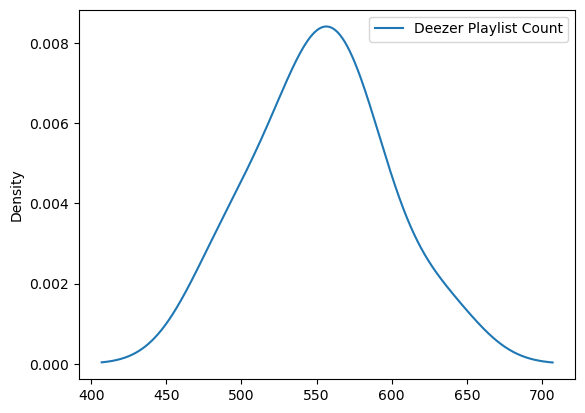

In [90]:
b=df.groupby('Track')['Deezer Playlist Reach'].sum().to_frame().sort_values(by=('Deezer Playlist Reach'),ascending=False)
b.head(10).plot(kind='bar')
b=df.groupby('Track')['Deezer Playlist Count'].sum().to_frame().sort_values(by=('Deezer Playlist Count'),ascending=False)
b.head(10).plot(kind='kde')

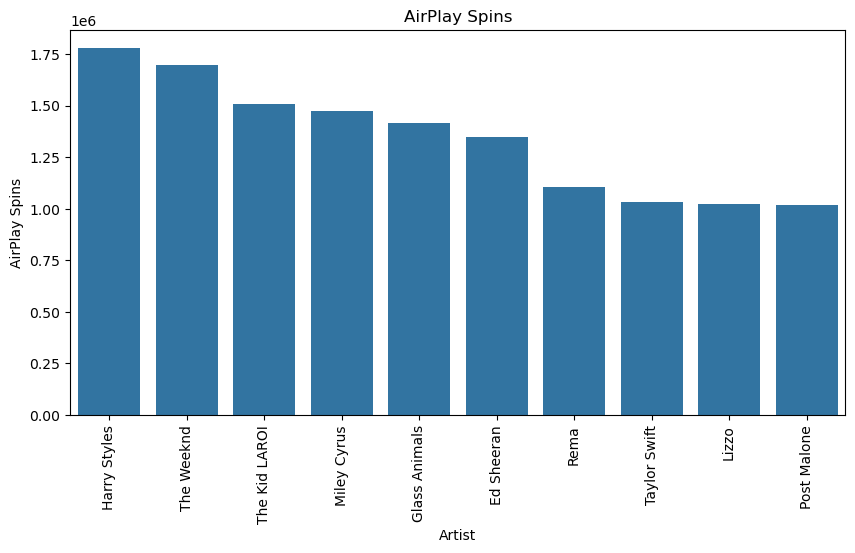

In [91]:
artist_with_highest_AirPlay_Spins=df.groupby('Artist')['AirPlay Spins'].max().to_frame().sort_values(by='AirPlay Spins',ascending=False)

artist_with_highest_AirPlay_Spins=artist_with_highest_AirPlay_Spins.head(10).reset_index()
plt.figure(figsize=(10,5))
sns.barplot(data=artist_with_highest_AirPlay_Spins, x='Artist', y='AirPlay Spins')
plt.xticks(rotation=90)
plt.title('AirPlay Spins')
plt.xlabel('Artist')
plt.ylabel('AirPlay Spins')
plt.show()

In [92]:
artist_with_highest_Pandora_streams=df.groupby('Artist')['Pandora Streams'].sum().to_frame().sort_values(by='Pandora Streams',ascending=False).head(10).reset_index()
artist_with_highest_Pandora_streams.head()

,Artist,Pandora Streams
0,Drake,7.276229e+09
1,Maroon 5,5.821284e+09
2,Post Malone,5.132705e+09
3,The Weeknd,4.998563e+09
4,Eminem,4.956105e+09


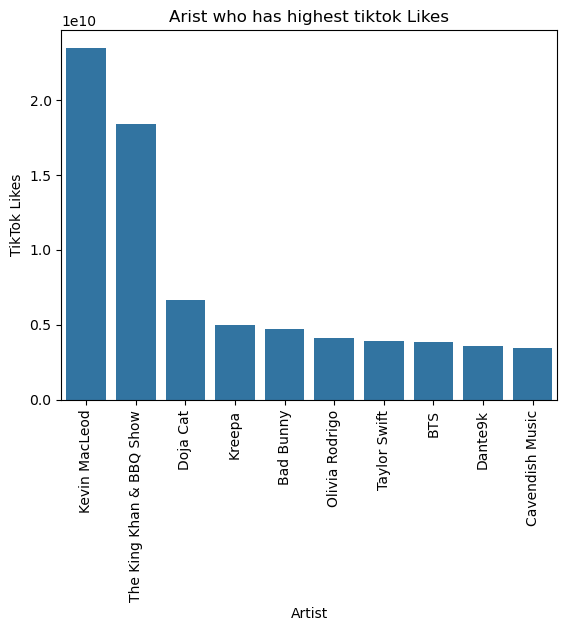

In [93]:
artist_TikTokPosts=df.groupby("Artist")["TikTok Likes"].sum().reset_index().sort_values(by="TikTok Likes",ascending=False).head(10)
sns.barplot(data=artist_TikTokPosts,x="Artist",y="TikTok Likes")
plt.title("Arist who has highest tiktok Likes")
plt.xticks(rotation=90)
plt.show()

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9],
 [Text(0, 0, 'Jawsh 685'),
  Text(1, 0, 'WZ Beat'),
  Text(2, 0, 'The King Khan & BBQ Show'),
  Text(3, 0, 'Kevin MacLeod'),
  Text(4, 0, 'Tollan Kim'),
  Text(5, 0, 'Doja Cat'),
  Text(6, 0, 'Young Thug'),
  Text(7, 0, 'Alan Walker'),
  Text(8, 0, 'Kina'),
  Text(9, 0, 'Bad Bunny')])

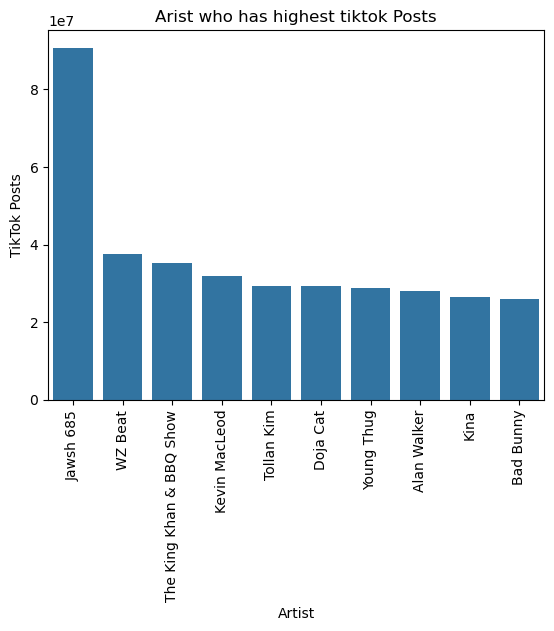

In [94]:
artist_TikTokPosts=df.groupby("Artist")["TikTok Posts"].sum().reset_index().sort_values(by="TikTok Posts",ascending=False).head(10)
sns.barplot(data=artist_TikTokPosts,x="Artist",y="TikTok Posts")
plt.title("Arist who has highest tiktok Posts")
plt.xticks(rotation=90)

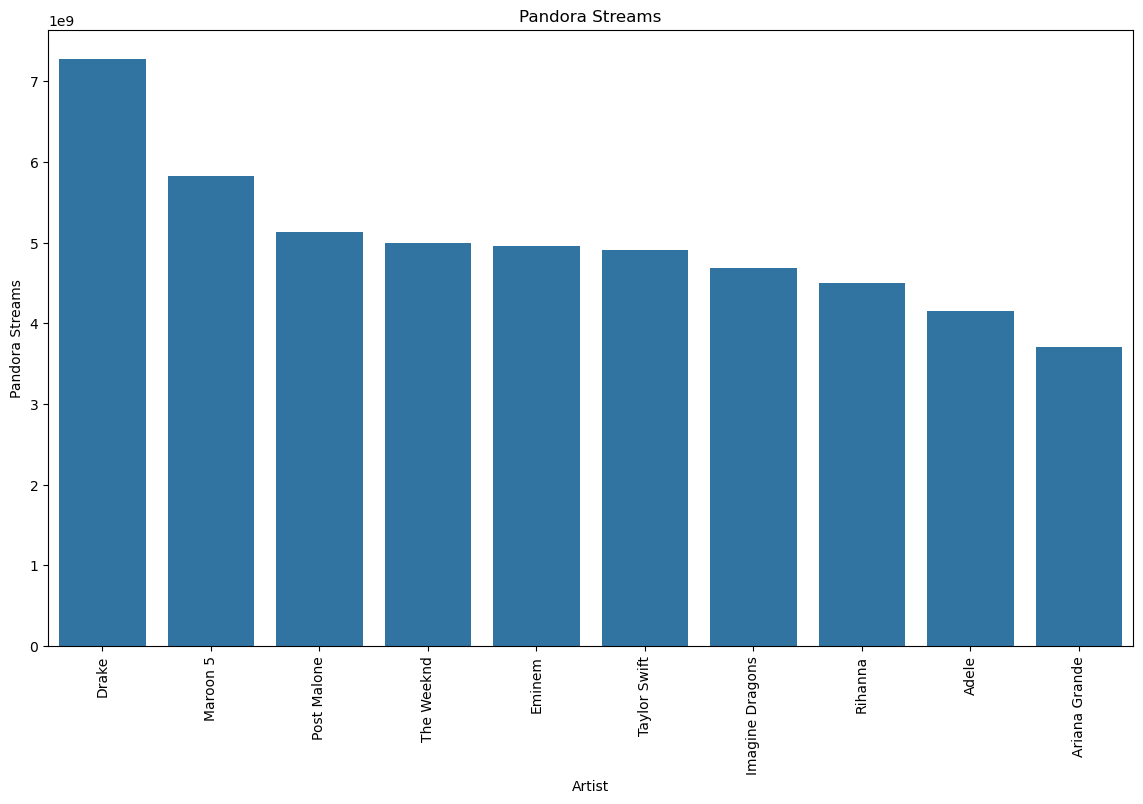

In [95]:
artist_with_highest_Pandora_streams=df.groupby('Artist')['Pandora Streams'].sum().to_frame().sort_values(by='Pandora Streams',ascending=False).head(10).reset_index()
artist_with_highest_Pandora_streams.head()
plt.figure(figsize=(14, 8))
sns.barplot(data=artist_with_highest_Pandora_streams.head(10), x='Artist', y='Pandora Streams')
plt.xticks(rotation=90) 
plt.title('Pandora Streams')
plt.xlabel('Artist')
plt.ylabel('Pandora Streams')
plt.show()

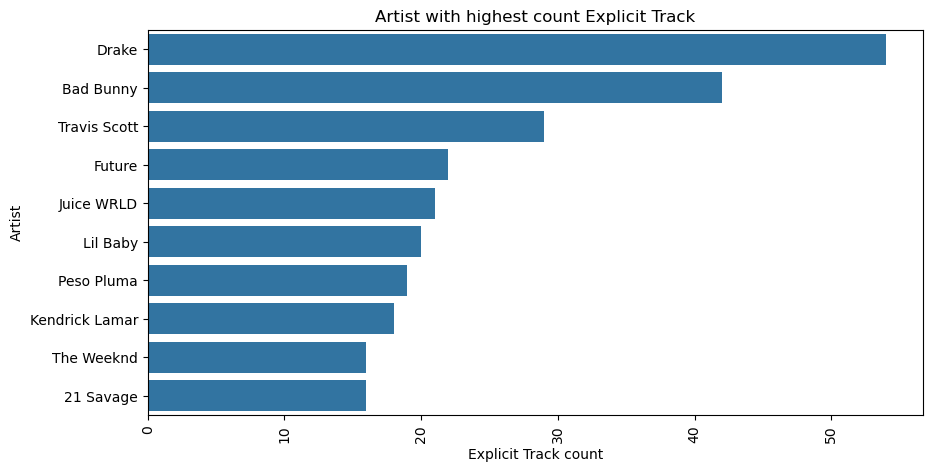

In [96]:
artist_with_highest_count_Explicit_Track=df[df['Explicit Track']==1].groupby('Artist')['Explicit Track'].sum().to_frame().sort_values(by='Explicit Track',ascending=False).head(10).reset_index()
plt.figure(figsize=(10,5))
sns.barplot(data=artist_with_highest_count_Explicit_Track, y='Artist', x='Explicit Track')
plt.xticks(rotation=90)
plt.title('Artist with highest count Explicit Track')
plt.ylabel('Artist')
plt.xlabel('Explicit Track count')
plt.show()

In [97]:
df.columns

Index(['Track', 'Album Name', 'Artist', 'Release Date', 'ISRC',
       'All Time Rank', 'Track Score', 'Spotify Streams',
       'Spotify Playlist Count', 'Spotify Playlist Reach',
       'Spotify Popularity', 'YouTube Views', 'YouTube Likes', 'TikTok Posts',
       'TikTok Likes', 'TikTok Views', 'YouTube Playlist Reach',
       'Apple Music Playlist Count', 'AirPlay Spins', 'SiriusXM Spins',
       'Deezer Playlist Count', 'Deezer Playlist Reach',
       'Amazon Playlist Count', 'Pandora Streams', 'Pandora Track Stations',
       'Shazam Counts', 'Explicit Track'],
      dtype='object')

In [98]:
def feature_engineering(df):
    df['Release Date']=pd.to_datetime(df["Release Date"],format='%m%d%Y')
    df["Year"]=df["Release Date"].dt.year
    return df
df=feature_engineering(df)
df.describe()

,Release Date,Track Score,Spotify Streams,Spotify Playlist Count,Spotify Playlist Reach,Spotify Popularity,YouTube Views,YouTube Likes,TikTok Posts,TikTok Likes,...,AirPlay Spins,SiriusXM Spins,Deezer Playlist Count,Deezer Playlist Reach,Amazon Playlist Count,Pandora Streams,Pandora Track Stations,Shazam Counts,Explicit Track,Year
count,4595,4595.000000,4.595000e+03,4595.000000,4.595000e+03,4595.000000,4.595000e+03,4.595000e+03,4.595000e+03,4.595000e+03,...,4.595000e+03,4595.000000,4595.000000,4.595000e+03,4595.000000,4.595000e+03,4.595000e+03,4.595000e+03,4595.000000,4595.000000
mean,2021-01-26 00:02:49.227421184,41.833384,4.425094e+08,59007.784875,2.319973e+07,64.109902,3.860129e+08,2.817240e+06,7.505880e+05,9.436750e+07,...,4.986200e+04,178.365615,28.860065,1.082454e+06,23.441132,6.819234e+07,6.587549e+04,2.319038e+06,0.359304,2020.613058
min,1987-07-21 00:00:00,19.400000,1.071000e+03,1.000000,1.000000e+00,1.000000,9.130000e+02,2.500000e+01,1.000000e+00,3.000000e+00,...,1.000000e+00,1.000000,1.000000,1.000000e+00,1.000000,2.000000e+00,1.000000e+00,1.000000e+00,0.000000,1987.000000
25%,2019-07-15 12:00:00,23.300000,7.305143e+07,6967.500000,4.888672e+06,62.000000,4.566014e+07,4.477960e+05,6.737500e+04,9.383282e+06,...,7.065000e+02,74.000000,7.000000,8.334700e+04,10.000000,2.595920e+06,2.728000e+03,2.882965e+05,0.000000,2019.000000
50%,2022-05-31 00:00:00,29.900000,2.398507e+08,32312.500000,1.325948e+07,67.000000,1.482696e+08,1.257935e+06,1.822000e+05,2.653441e+07,...,5.953500e+03,86.000000,15.000000,2.371205e+05,17.000000,1.273577e+07,7.832000e+03,8.545840e+05,0.000000,2022.000000
75%,2023-08-11 00:00:00,44.400000,6.125803e+08,84990.500000,2.931760e+07,71.000000,4.209386e+08,3.356874e+06,4.606410e+05,6.738947e+07,...,3.651900e+04,103.000000,30.000000,6.087245e+05,28.000000,4.687370e+07,2.374200e+04,2.242932e+06,1.000000,2023.000000
max,2024-06-14 00:00:00,725.400000,4.281469e+09,590392.000000,2.623434e+08,96.000000,1.632276e+10,6.231118e+07,4.290000e+07,2.347422e+10,...,1.777811e+06,7098.000000,632.000000,4.819785e+07,210.000000,1.463624e+09,3.780513e+06,2.197945e+08,1.000000,2024.000000
std,NaN,38.555815,5.330055e+08,70698.768836,2.949469e+07,14.771305,6.812935e+08,4.455733e+06,2.134861e+06,4.892611e+08,...,1.218144e+05,416.117463,49.053193,3.206495e+06,23.094960,1.496600e+08,2.249775e+05,5.676584e+06,0.479849,3.611946


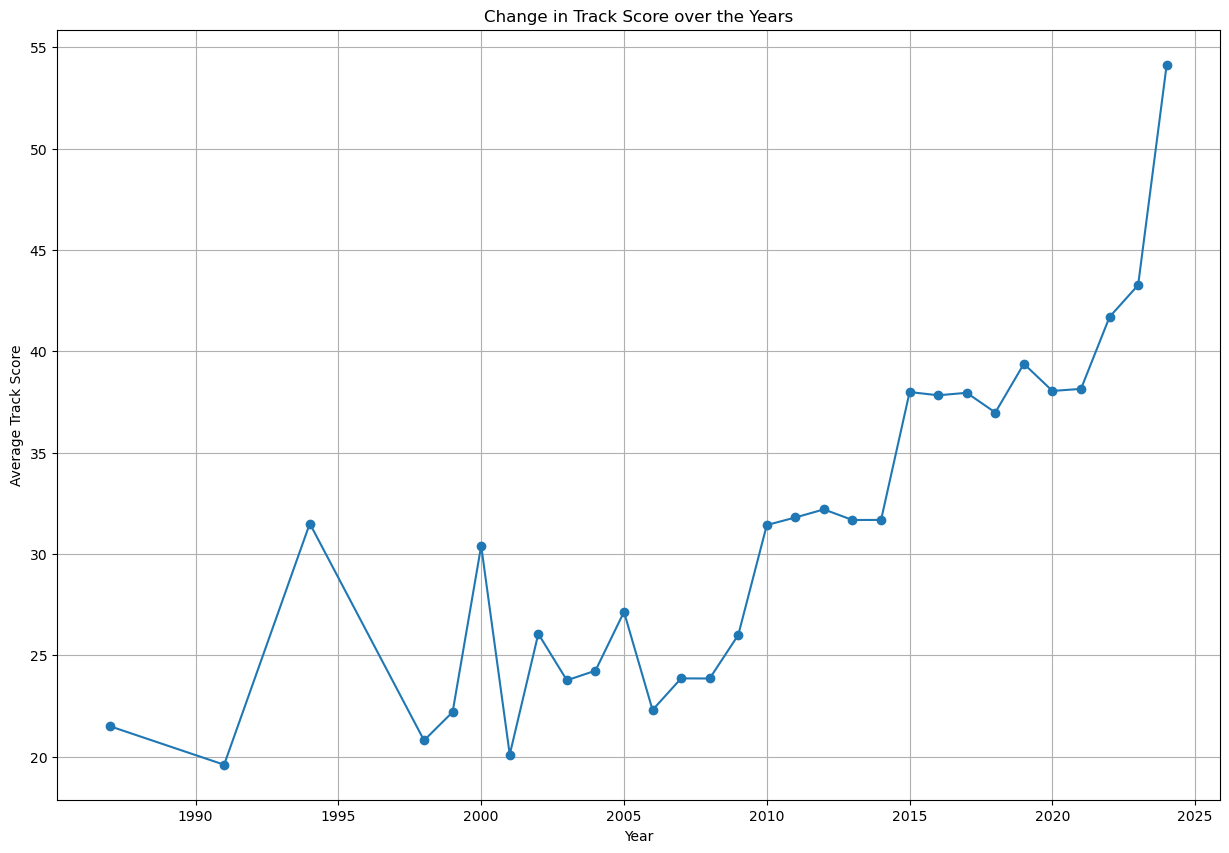

In [100]:
avg_track_score_per_year=df.groupby("Year")["Track Score"].mean()
plt.figure(figsize=(15,10))
avg_track_score_per_year.plot(kind='line',marker='o')
plt.title("Change in Track Score over the Years")
plt.xlabel("Year")
plt.ylabel("Average Track Score")
plt.grid(True)
plt.show()

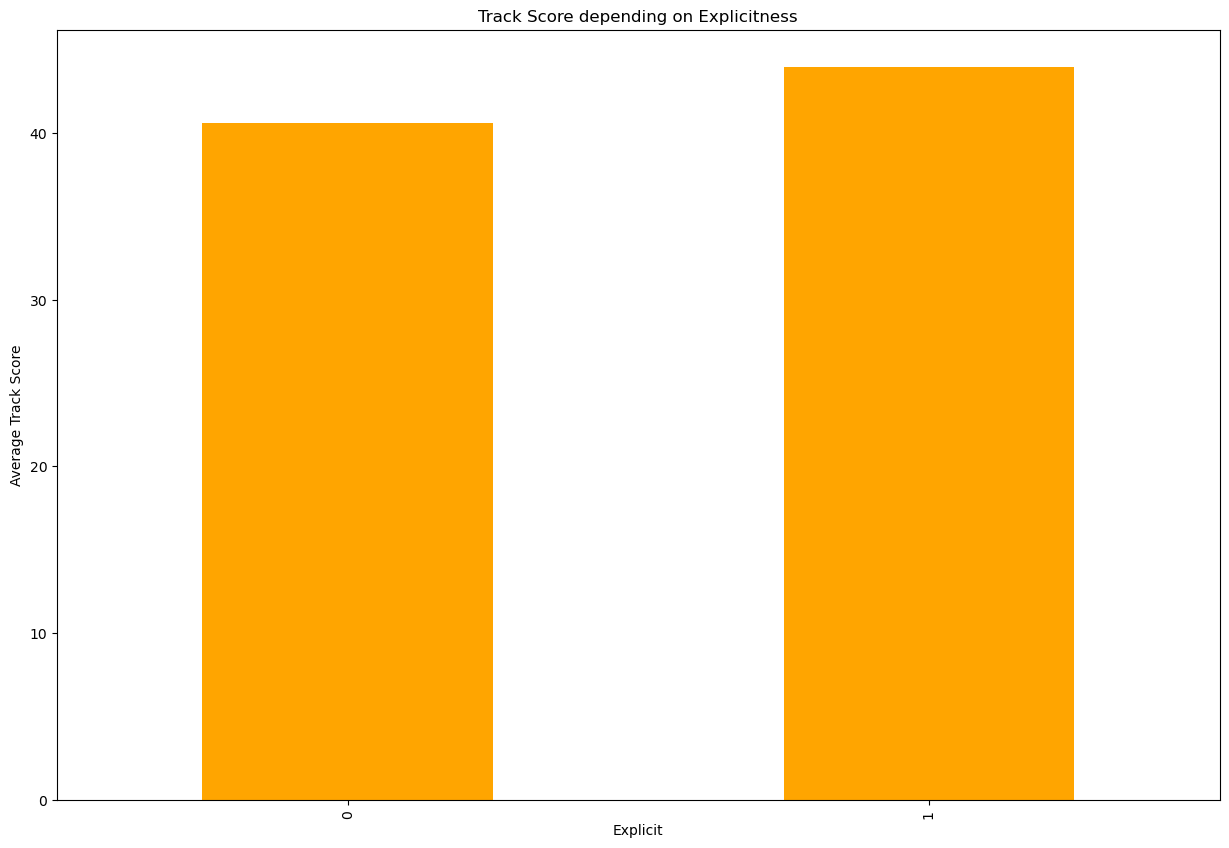

In [101]:
explicit_track_scores = df.groupby('Explicit Track')['Track Score'].mean()
plt.figure(figsize=(15, 10))
explicit_track_scores.plot(kind='bar', color='orange')
plt.title('Track Score depending on Explicitness')
plt.xlabel('Explicit')
plt.ylabel('Average Track Score')
plt.show()

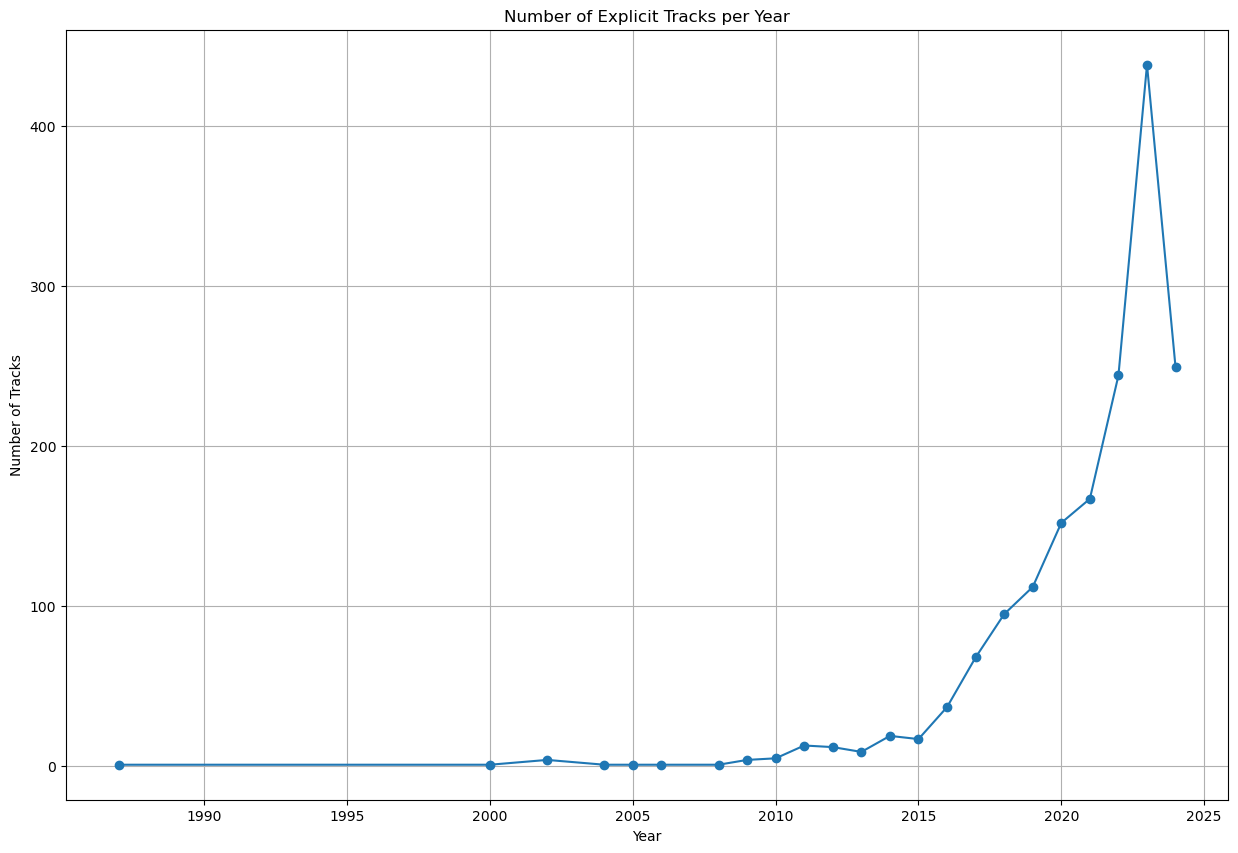

In [102]:
explicit_tracks = df[df['Explicit Track'] == 1]
explicit_tracks_per_year = explicit_tracks.groupby('Year')['Track'].count()
plt.figure(figsize=(15, 10))
explicit_tracks_per_year.plot(kind='line', marker='o')
plt.title('Number of Explicit Tracks per Year')
plt.xlabel('Year')
plt.ylabel('Number of Tracks')
plt.grid(True)
plt.show()